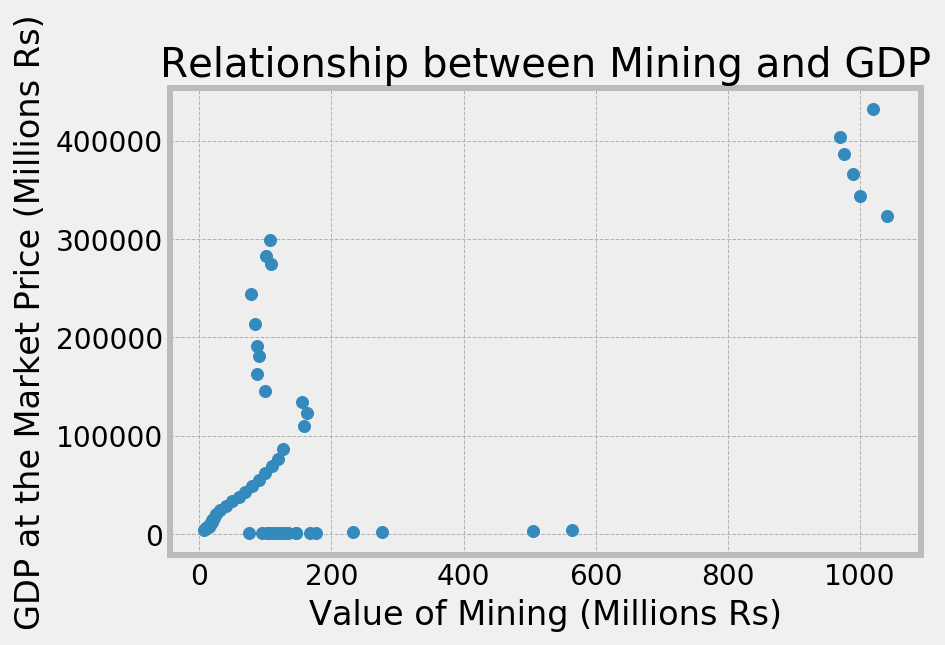

In [391]:
plt.scatter(df_GDP.mining, df_GDP.gdp_market_price)
plt.xlabel('Value of Mining (Millions Rs)')
plt.ylabel('GDP at the Market Price (Millions Rs)')
plt.title('Relationship between Mining and GDP')
plt.show()

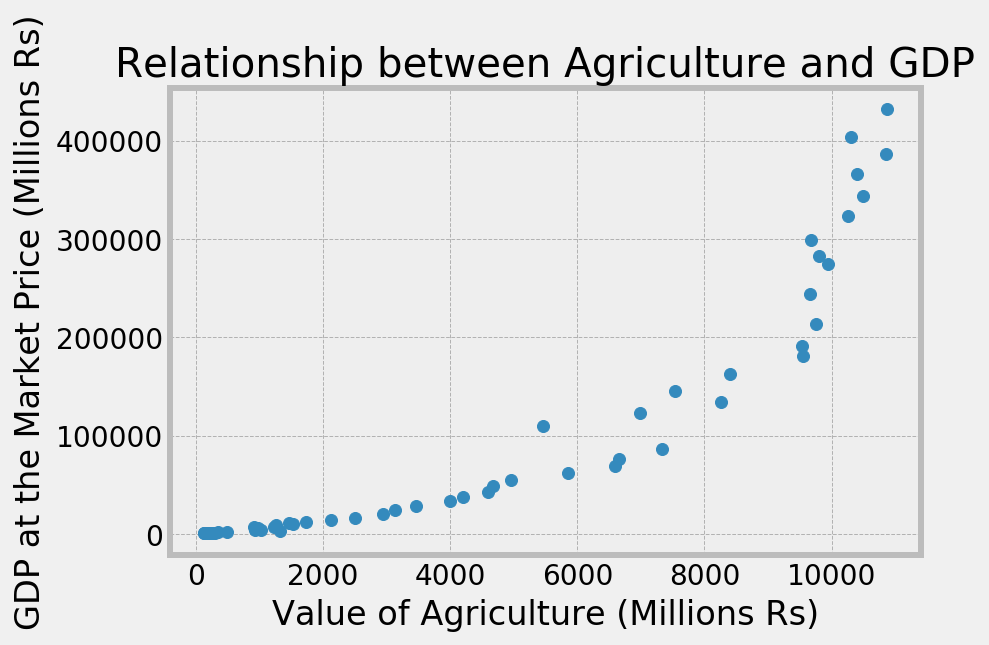

In [392]:
plt.scatter(df_GDP.agriculture, df_GDP.gdp_market_price)
plt.xlabel('Value of Agriculture (Millions Rs)')
plt.ylabel('GDP at the Market Price (Millions Rs)')
plt.title('Relationship between Agriculture and GDP')
plt.show()

In [393]:
import pandas as pd
import numpy as np
from IPython.display import display
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from matplotlib import cm
import math
import sklearn

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

%config InlineBackend.figure_formats = {'png', 'retina'}

#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [394]:
df_LifeExp = pd.read_pickle('LifeExp.pkl')
df_LifeExp


,Male,Female
1962,58.70,62.00
1972,61.00,65.90
1982,64.38,71.69
1990,65.57,73.39
1991,66.15,73.89
1992,66.39,73.86
1993,66.44,73.95
1994,66.46,74.00
1995,66.56,74.28
1996,66.44,74.35


In [395]:
df_LifeExp_lr = df_LifeExp.drop(labels = ['Female'], axis = 1)
df_LifeExp_lr = df_LifeExp_lr.transpose()
df_LifeExp_lr

,1962,1972,1982,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Male,58.7,61.0,64.38,65.57,66.15,66.39,66.44,66.46,66.56,66.44,...,69.33,69.47,69.69,69.8,70.07,70.42,70.67,70.97,71.08,71.19


In [396]:
"""
# linear regression for life expectancy 
y = df_LifeExp_lr.loc[:, 2015]
x = df_LifeExp_lr.drop(labels = [2015], axis = 1)

lm = LinearRegression()

lm.fit(x, y)

print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
"""


"\n# linear regression for life expectancy \ny = df_LifeExp_lr.loc[:, 2015]\nx = df_LifeExp_lr.drop(labels = [2015], axis = 1)\n\nlm = LinearRegression()\n\nlm.fit(x, y)\n\nprint('Estimated intercept coefficient:', lm.intercept_)\nprint('Number of coefficients:', len(lm.coef_))\n"

## Economic Analysis 

In [397]:
df_GDP = pd.read_csv('GDP.csv')
df_GDP.set_index('Years', inplace = True)

df_GDP.head()
#df_GDP.shape

,agriculture,mining,manufacturing,power,government,sevices,gdp_market_price
Years,,,,,,,
1950,129.0,95.0,17.0,46.0,4.0,30.0,445.0
1951,145.0,109.0,20.0,56.0,5.0,36.0,509.0
1952,156.0,122.0,23.0,62.0,6.0,43.0,572.0
1953,177.0,108.0,27.0,54.0,7.0,49.0,594.0
1954,170.0,106.0,27.0,58.0,7.0,53.0,590.0


In [398]:
len(df_GDP.gdp_market_price.iloc[21:67])

46

In [403]:
gdpx

,agriculture,mining,manufacturing,power,government,sevices
Years,,,,,,
1950,129.0,95.0,17.0,46.0,4.0,30.0
1951,145.0,109.0,20.0,56.0,5.0,36.0
1952,156.0,122.0,23.0,62.0,6.0,43.0
1953,177.0,108.0,27.0,54.0,7.0,49.0
1954,170.0,106.0,27.0,58.0,7.0,53.0
1955,179.0,109.0,26.0,60.0,7.0,55.0
1956,200.0,120.0,26.0,61.0,9.0,57.0
1957,200.0,115.0,29.0,68.0,9.0,60.0
1958,188.0,102.0,30.0,68.0,10.0,64.0


In [400]:
y

Years
1984     12050.0
1985     13880.0
1986     16450.0
1987     20341.0
1988     24061.0
1989     28083.0
1990     33030.0
1991     37553.0
1992     42393.0
1993     48186.0
1994     54848.0
1995     61489.0
1996     69030.0
1997     76149.0
1998     86304.0
1999    109400.0
2000    122410.0
2001    134392.0
2002    145055.0
2003    162291.0
2004    180908.0
2005    191393.0
2006    213444.0
2007    243998.0
2008    274316.0
2009    282354.0
2010    298784.0
2011    323310.0
2012    343942.0
2013    366325.0
2014    386229.0
2015    403536.0
2016    431823.0
Name: gdp_market_price, dtype: float64

In [402]:
# linear regression for gdp based on industry
y = df_GDP.loc[:, 'gdp_market_price']
gdpx = df_GDP.drop(labels = ['gdp_market_price'], axis = 1)

lm = LinearRegression()

lm.fit(gdpx, y)

print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))


Estimated intercept coefficient: 738.6651060732256
Number of coefficients: 6


In [176]:
dict(zip(x.columns, lm.coef_))

{'agriculture': -5.74578674345625,
 'mining': 10.763752710836199,
 'manufacturing': 4.72202531127658,
 'power': 7.807616924438611,
 'government': 6.486839388398912,
 'sevices': -1.9630922231556305}

In [177]:
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,agriculture,-5.745787
1,mining,10.763753
2,manufacturing,4.722025
3,power,7.807617
4,government,6.486839
5,sevices,-1.963092


In [317]:
futgdp = lm.predict(x)
futgdp

array([  1426.49452337,   1572.20500466,   1702.68710703,   1382.46849936,
         1424.53959995,   1412.08580148,   1426.68067094,   1435.79202512,
         1368.16917661,   1453.35454875,   1584.10306629,   1637.52240187,
         1757.68467042,   1749.03594242,   1841.59319315,   1897.60765353,
         1821.55111145,   1863.8819804 ,   1804.78033743,   1829.98908676,
         1929.94568077,   1999.96980605,   2385.12126351,   2491.50601911,
          572.65415869,   3875.06132545,   1957.58638825,   2533.28432406,
         3440.87948721,   3475.31419483,   5184.38427586,   4979.16117894,
         4825.01042036,   5480.28188735,   6953.15599796,   9313.12573367,
        13547.56721773,  18120.25909747,  22259.944365  ,  26660.16066789,
        32138.65138963,  37625.91909745,  43728.69308604,  51235.30918695,
        59140.29877889,  63359.45958636,  72130.955533  ,  80666.54394306,
        94033.68857333, 119210.75202695, 126819.0644886 , 141108.68890308,
       154151.1165437 , 1

<function matplotlib.pyplot.show(*args, **kw)>

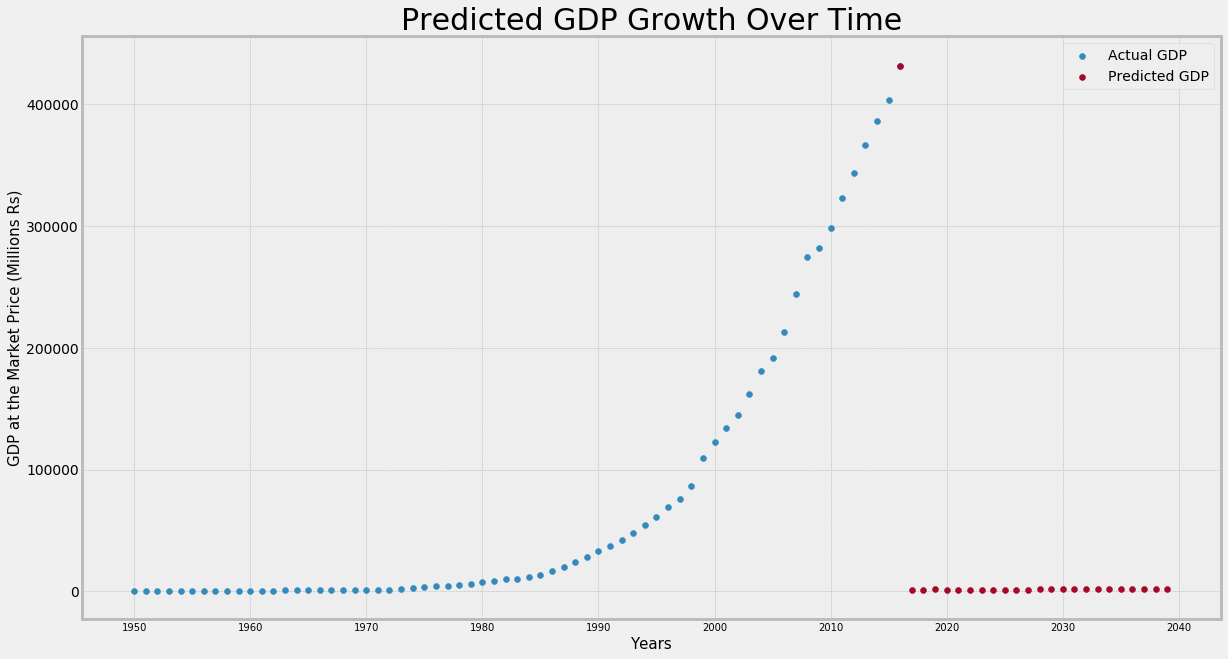

In [324]:
x = df_futgdp.index[0:67]
y = df_futgdp.iloc[0:67]
xp = df_futgdp.index[66:90]
z = df_futgdp.iloc[66:90]

fig = plt.figure(figsize=(40,10), linewidth = 10)
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=10)


plt.xlabel('Years', fontsize=15)
plt.ylabel('GDP at the Market Price (Millions Rs)', fontsize=15)
plt.title('Predicted GDP Growth Over Time', fontsize=30)
plt.plot(linewidth = 10)

plt.scatter(x,y)
plt.scatter(xp,z)
plt.legend(['Actual GDP','Predicted GDP'])
plt.show

In [181]:
mseFULL = np.mean((df_GDP.gdp_market_price - lm.predict(x))**2)
print(mseFULL)

lm.fit(x[['agriculture']], df_GDP.gdp_market_price)


20073042.36398629


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
mseAGRI = np.mean((df_GDP.gdp_market_price - lm.predict(x[['agriculture']]))**2)
print(mseAGRI)

2386566673.020879


In [432]:
gdp_man_gov = df_GDP.loc[:, ['manufacturing', 'government']]

In [433]:
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(gdp_man_gov,df_GDP.gdp_market_price, test_size = 0.33, random_state = 5 )
print("x_train", x_train)
print("x_test",  x_test)
print("y_train", y_train)
print("y_test", y_test)

x_train        manufacturing  government
Years                           
1967            59.0        17.0
2002         27654.0      7764.0
1976           631.0       333.0
1969            46.0        18.0
1991          8766.0      2680.0
1956            26.0         9.0
1983          1678.0       655.0
1952            23.0         6.0
1981          1377.0       588.0
2000         24171.0      6693.0
1954            27.0         7.0
1988          5847.0      1410.0
1950            17.0         4.0
1955            26.0         7.0
1964            53.0        16.0
2001         26934.0      7132.0
1992          9952.0      3065.0
1996         16455.0      4461.0
1959            32.0        10.0
1968            49.0        16.0
1972            73.0        22.0
1970            48.0        20.0
2009         47325.0     15322.0
1951            20.0         5.0
1961            52.0        12.0
1963            49.0        14.0
1994         12686.0      4032.0
2016         60091.0     26435.0
20

In [434]:
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

print('Fit a modelX_train, and calculate MSE with Y_train:', np.mean((y_train - lm.predict(x_train)) ** 2))
print('Fit a modelX_train, and calculate MSE with X_test, Y_test:', np.mean((y_test - lm.predict(x_test)) ** 2))

Fit a modelX_train, and calculate MSE with Y_train: 60071022.20122464
Fit a modelX_train, and calculate MSE with X_test, Y_test: 53463573.77474049


In [450]:
lm.fit(x_train, y_train)
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: -2381.940213891241
Number of coefficients: 2


In [437]:
pred_train

array([ -2055.78992574, 147881.48339849,   3037.38430935,  -2067.0337108 ,
        48045.96517375,  -2218.94451984,   9084.75273648,  -2262.80735978,
         7672.83879536, 127766.32576081,  -2242.64397063,  26430.8670309 ,
        -2299.43917643,  -2244.49145146,  -2079.64827657, 138478.4668028 ,
        55154.86178331,  85000.78793521,  -2195.08616901,  -2087.03819992,
        -1966.05786497,  -2037.7918175 , 280765.13353873,  -2281.12326811,
        -2132.58962066,  -2112.58513154,  72557.81583021, 446301.59947005,
       260704.4955307 , 320702.20797796, 166521.58017357, 116196.35398551,
        -2075.9533149 ,  -2132.58962066,  -2213.40207733, 406881.53998263,
         6866.08500938, 101554.60834729,   4095.47601054,  32764.61618948,
        15934.56130368,  -2198.78113068,  -2081.49575741, 306196.48528775])

In [444]:
len(list(df_GDP['gdp_market_price'].values))

67

In [445]:
#pred_test = sorted(pred_test)

df_futgdp = pd.DataFrame(list(df_GDP['gdp_market_price'].values) + list(pred_test), index = list(range(1950, 1950 + len(list(df_GDP['gdp_market_price'].values)) +len(pred_test))), columns = ['future_gdp'])
#df_futgdp.sort_values('future_gdp', inplace = True)
#pred_test
df_futgdp


,future_gdp
1950,445.000000
1951,509.000000
1952,572.000000
1953,594.000000
1954,590.000000
1955,618.000000
1956,661.000000
1957,683.000000
1958,678.000000
1959,723.000000


<function matplotlib.pyplot.show(*args, **kw)>

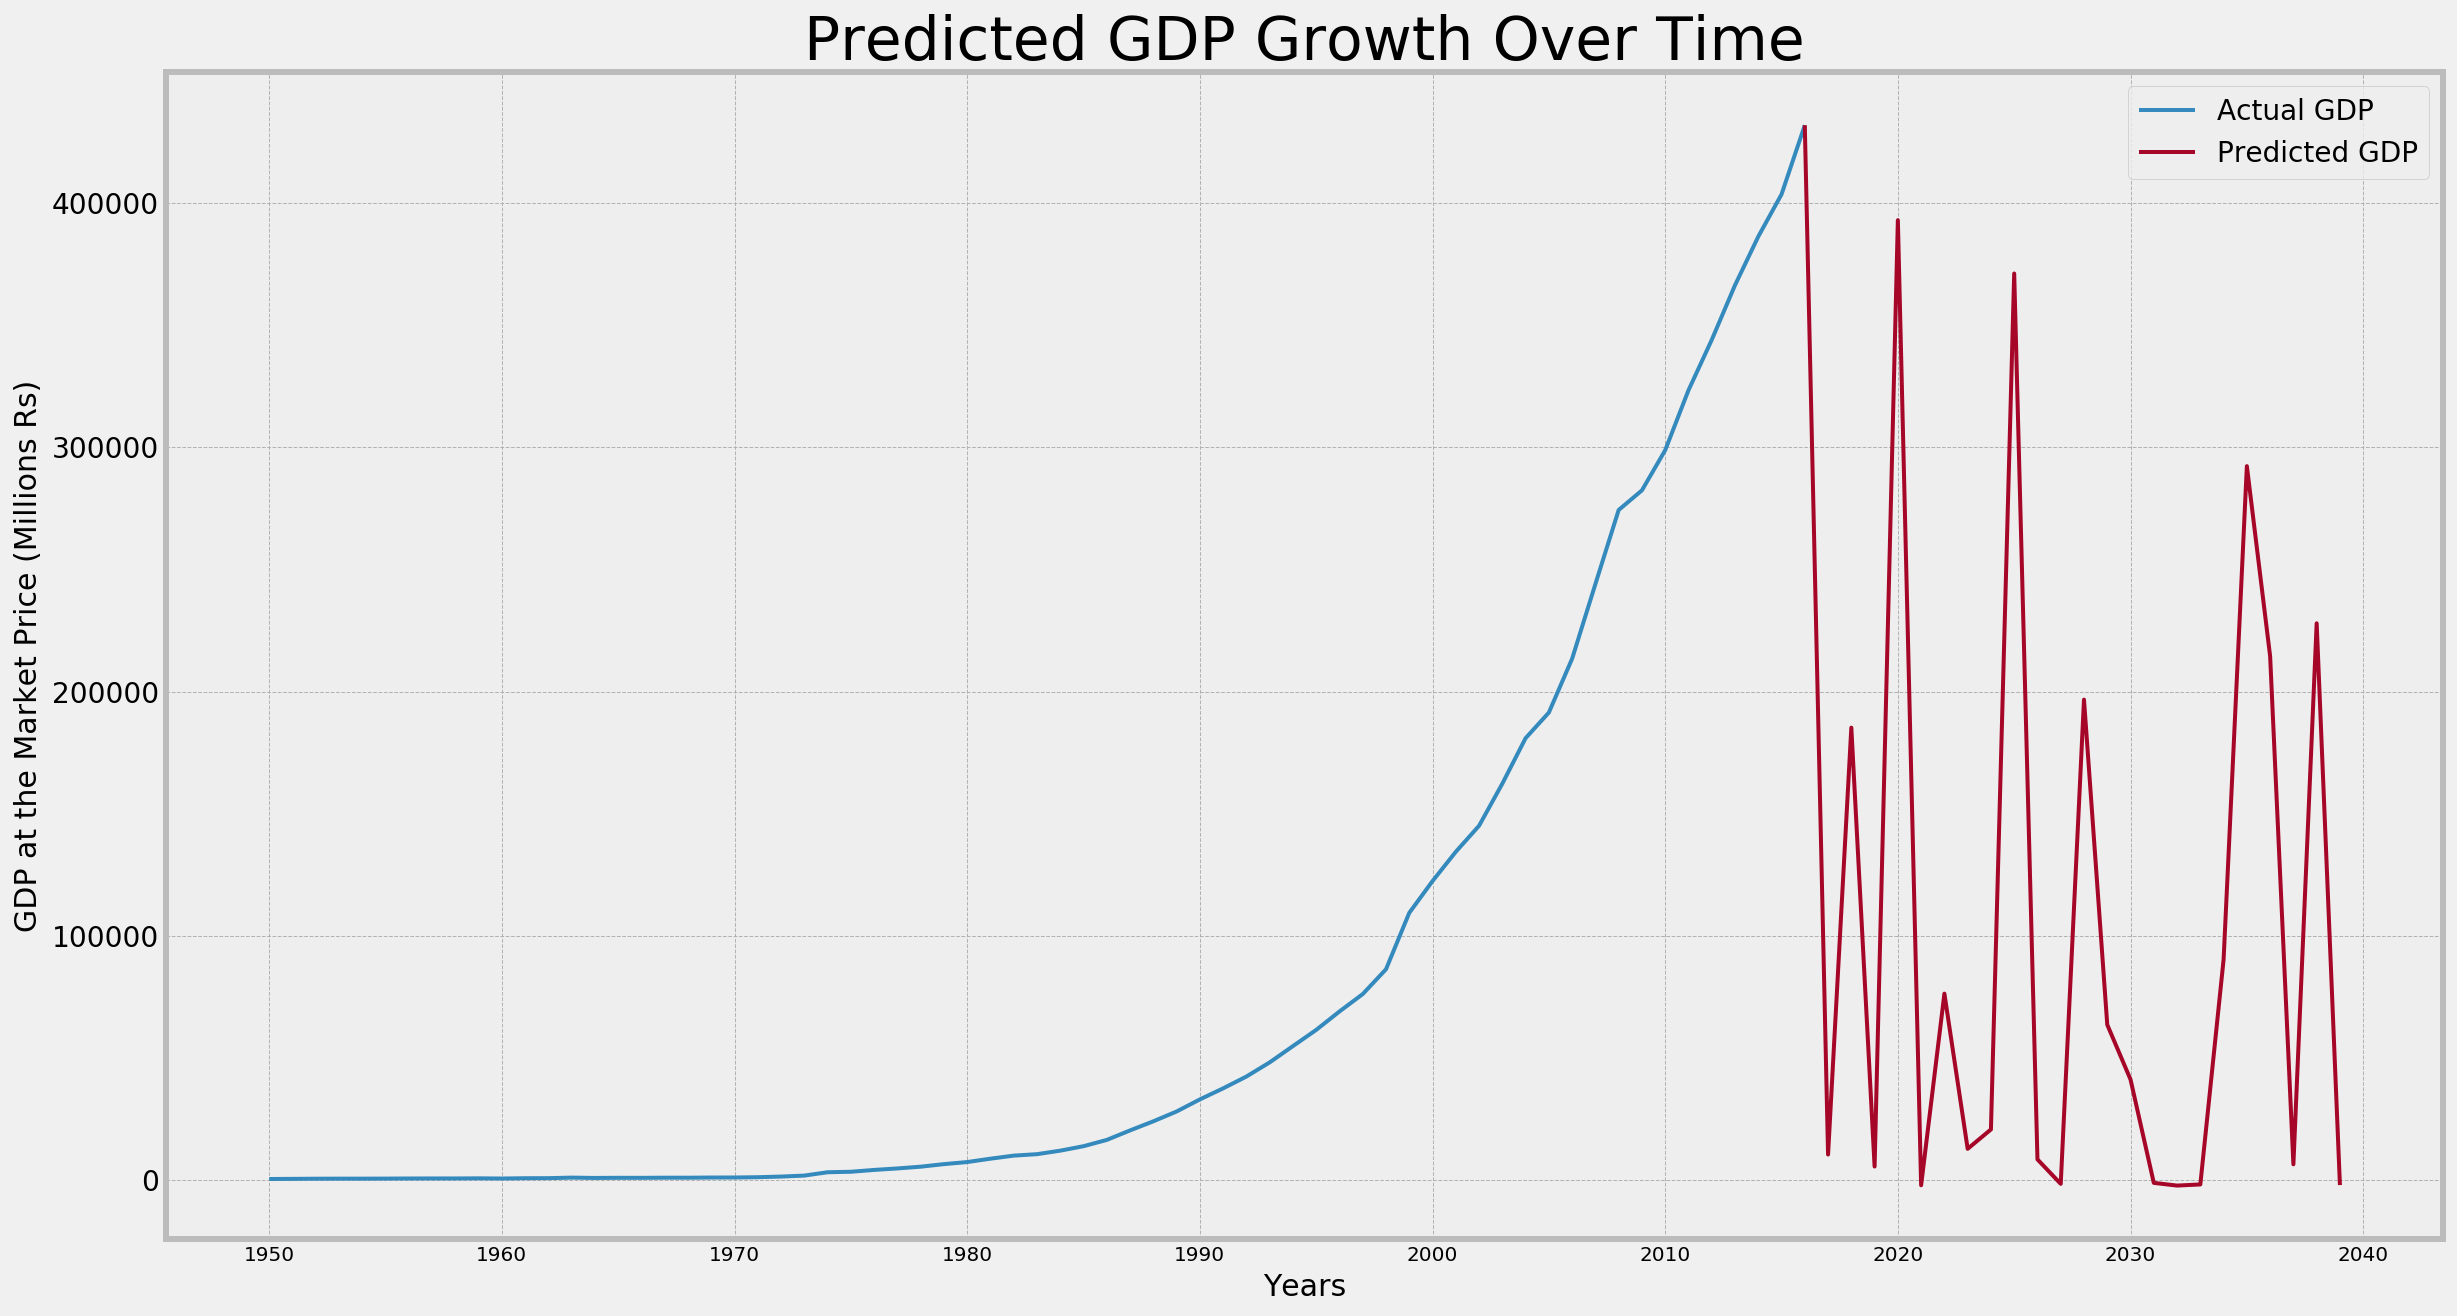

In [447]:
# plot with test and train data 
x = df_futgdp.index[0:67]
y = df_futgdp.iloc[0:67]
xp = df_futgdp.index[66:90]
z = df_futgdp.iloc[66:90]

fig = plt.figure(figsize=(40,10), linewidth = 10)
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=10)


plt.xlabel('Years', fontsize=15)
plt.ylabel('GDP at the Market Price (Millions Rs)', fontsize=15)
plt.title('Predicted GDP Growth Over Time', fontsize=30)
plt.plot(linewidth = 10)

plt.plot(x,y)
plt.plot(xp,z)
plt.legend(['Actual GDP','Predicted GDP'])
plt.show

In [320]:
len(list(futgdp))


67

In [261]:
pred_train

array([2.26671227e+03, 1.50971267e+05, 2.32415200e+02, 2.46670728e+03,
       3.55423597e+04, 1.53190799e+03, 3.75250854e+03, 1.83807656e+03,
       3.23751769e+03, 1.23877336e+05, 1.28392653e+03, 2.05440402e+04,
       1.07541274e+03, 1.32723675e+03, 1.97754790e+03, 1.38934121e+05,
       4.16229852e+04, 6.99459980e+04, 1.47417593e+03, 2.11000461e+03,
       4.53203718e+03, 2.55112230e+03, 2.82902477e+05, 1.47642449e+03,
       1.61184698e+03, 2.86617587e+03, 5.64355074e+04, 4.35656691e+05,
       2.66906117e+05, 3.31761322e+05, 1.63216420e+05, 1.16000073e+05,
       2.28626248e+03, 1.80876900e+03, 1.46739717e+03, 4.06293461e+05,
       3.29783361e+03, 9.18567373e+04, 7.52734183e+02, 2.48617352e+04,
       1.21848077e+04, 1.17691944e+03, 2.06886894e+03, 3.23627004e+05])

Text(0,0.5,'Residuals')

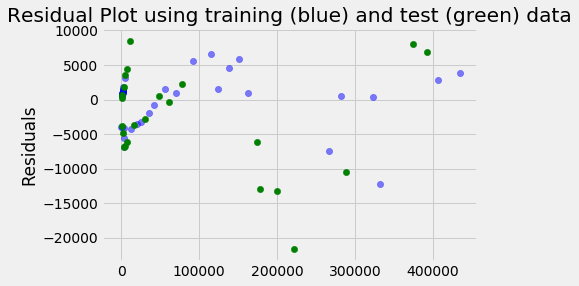

In [203]:
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, c = 'b', s = 40, alpha = 0.5)
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test, c ='g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

In [182]:
df_demographics = pd.read_csv('Demographics.csv')
df_demographics.set_index(['Years', 'Sexes'], inplace = True)
df_demographics.head()

0    1 - 4     5 - 9  10 - 14   15 - 19   20 - 24  \
Years Sexes                                                                 
1984  Male         9719.0  45334.0   54756.0  48151.0   54919.0   54506.0   
      Female       9368.0  43692.0   52484.0  46678.0   53987.0   53953.0   
      Both Sexes  19087.0  89026.0  107240.0  94829.0  108906.0  108459.0   
1985  Male         9288.0  42804.0   56458.0  48310.0   53751.0   55607.0   
      Female       9027.0  40612.0   53959.0  46895.0   52013.0   54307.0   

                  25 - 29  30 - 34  35 - 39  40 - 44  45 - 49  50 - 54  \
Years Sexes                                                              
1984  Male        46605.0  40744.0  28032.0  21121.0  19411.0  16801.0   
      Female      45671.0  39800.0  29441.0  22264.0  19403.0  16320.0   
      Both Sexes  92276.0  80544.0  57473.0  43385.0  38814.0  33121.0   
1985  Male        47586.0  40933.0  29662.0  22329.0  19992.0  17467.0   
      Female      46990.0  40211.0  30401.0  23496.0  19683.0  16899.0   

                  55 - 59  60 - 64  65 - 69  70 - 74  75 - 79  80 - 84  \
Years Sexes                                                              
1984  Male        16940.0  12720.0   8645.0   5585.0   2846.0   1095.0   
      Female      16695.0  13301.0   9721.0   7281.0   4495.0   2670.0   
      Both Sexes  33635.0  26021.0  18366.0  12866.0   7341.0   3765.0   
1985  Male        16797.0  14138.0   8477.0   5862.0   2799.0   1217.0   
      Female      16411.0  14212.0   9725.0   7561.0   4527.0   2735.0   

                    85 +  All ages  
Years Sexes                         
1984  Male         419.0  488349.0  
      Female      1556.0  488780.0  
      Both Sexes  1975.0  977129.0  
1985  Male         423.0  493900.0  
      Female      1646.0  491310.0

In [455]:
idx = pd.IndexSlice
len(df_demographics.loc[idx['1984':'2016','Both Sexes'],'20 - 24'])
college_kids = df_demographics.loc[idx['1984':'2016','Both Sexes'],'20 - 24']
college_kids
#df_demographics.loc[idx['1984':'2016','Both Sexes'],'All ages']

Years  Sexes     
1984   Both Sexes    108459.0
1985   Both Sexes    109914.0
1986   Both Sexes    112085.0
1987   Both Sexes    109941.0
1988   Both Sexes    107363.0
1989   Both Sexes    104312.0
1990   Both Sexes     99485.0
1991   Both Sexes     94959.0
1992   Both Sexes     92977.0
1993   Both Sexes     89257.0
1994   Both Sexes     91168.0
1995   Both Sexes     91215.0
1996   Both Sexes     92854.0
1997   Both Sexes     96164.0
1998   Both Sexes    101140.0
1999   Both Sexes    104495.0
2000   Both Sexes    107327.0
2001   Both Sexes    109373.0
2002   Both Sexes    109073.0
2003   Both Sexes    105656.0
2004   Both Sexes    101268.0
2005   Both Sexes     94820.0
2006   Both Sexes     89630.0
2007   Both Sexes     85645.0
2008   Both Sexes     84356.0
2009   Both Sexes     84814.0
2010   Both Sexes     86712.0
2011   Both Sexes     89763.0
2012   Both Sexes     93075.0
2013   Both Sexes     95527.0
2014   Both Sexes     96471.0
2015   Both Sexes     96826.0
2016   Both Sexes     

In [230]:
df_PrimEduRatio = pd.read_csv('PrimEduRatio.csv')
df_PrimEduRatio.set_index('Years', inplace = True)
df_PrimEduRatio.head()
#df_PrimEduRatio.shape

,Enrolment_Total,Enrolment_Male,Enrolment_Female,Pop_Total,Pop_Male,Pop_Female,Ratio_Total,Ratio_Male,Ratio_Female
Years,,,,,,,,,
1972,151614.0,77401.0,74213.0,142800.0,72239.0,70561.0,106.0,107.0,105.0
1973,150656.0,76812.0,73844.0,142695.0,72107.0,70588.0,106.0,107.0,105.0
1974,148142.0,75546.0,72596.0,139965.0,70663.0,69302.0,106.0,107.0,105.0
1975,145475.0,74220.0,71255.0,135568.0,68351.0,67217.0,107.0,109.0,106.0
1976,139439.0,71077.0,68362.0,131453.0,66368.0,65085.0,106.0,107.0,105.0


In [184]:
df_SecEduRatio = pd.read_csv('SecEduRatio.csv')
df_SecEduRatio.set_index('Years', inplace = True)
df_SecEduRatio.head()
df_SecEduRatio.shape

(46, 9)

In [451]:
df_TerEduRatio = pd.read_csv('TerEduRatio.csv')
df_TerEduRatio.set_index('Years', inplace = True)
df_TerEduRatio.head()
#df_TerEduRatio.shape

,Public_Male,Public_Female,Public_Total,Private_Male,Private_Female,Private_Total,Overseas_Male,Overseas_Female,Overseas_Total,Overall_Male,Overall_Female,Overall_Total
Years,,,,,,,,,,,,
2000,4185.0,4872.0,9057.0,2522.0,2733.0,5255.0,1087.0,1336.0,2423.0,7794.0,8941.0,16735.0
2001,5025.0,5996.0,11021.0,2928.0,3172.0,6100.0,1365.0,1654.0,3019.0,9318.0,10822.0,20140.0
2002,4856.0,5024.0,9880.0,3476.0,3766.0,7242.0,2146.0,2645.0,4791.0,10478.0,11435.0,21913.0
2003,6403.0,6307.0,12710.0,3603.0,3904.0,7507.0,2464.0,3004.0,5468.0,12470.0,13215.0,25685.0
2004,5625.0,6088.0,11713.0,3607.0,3908.0,7515.0,2968.0,3878.0,6846.0,12200.0,13874.0,26074.0


<function matplotlib.pyplot.show(*args, **kw)>

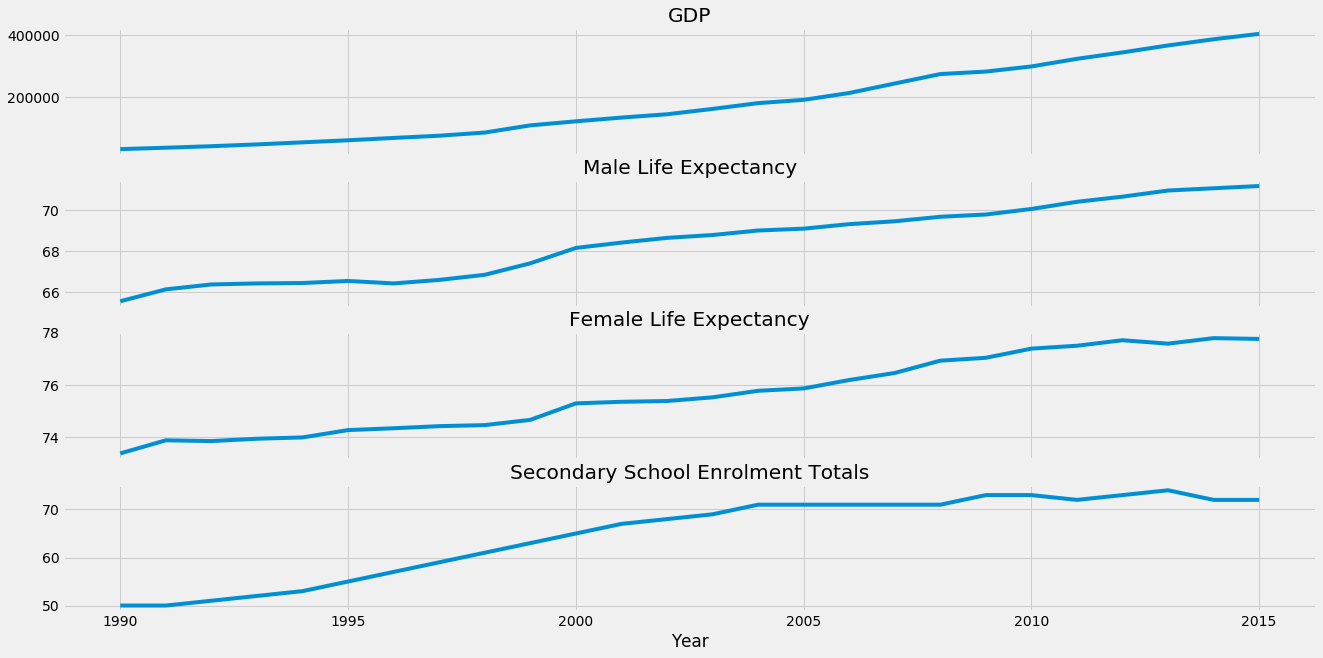

In [186]:
Years = list(range(1990, 2016))
a = df_GDP['gdp_market_price'].iloc[40:66]
b = df_LifeExp['Male'].iloc[3:29]
c = df_LifeExp['Female'].iloc[3:29]
d = df_SecEduRatio['Ratio_Total'].iloc[20:46]



fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex = True, figsize=(20,10))


ax.tick_params(axis='x', labelsize=8)

ax1.plot(Years, a)
ax1.set_title('GDP')
ax2.plot(Years, b)
ax2.set_title('Male Life Expectancy')
ax3.plot(Years, c)
ax3.set_title('Female Life Expectancy')
ax4.plot(Years, d)
ax4.set_title('Secondary School Enrolment Totals')

plt.xlabel('Year')

plt.show

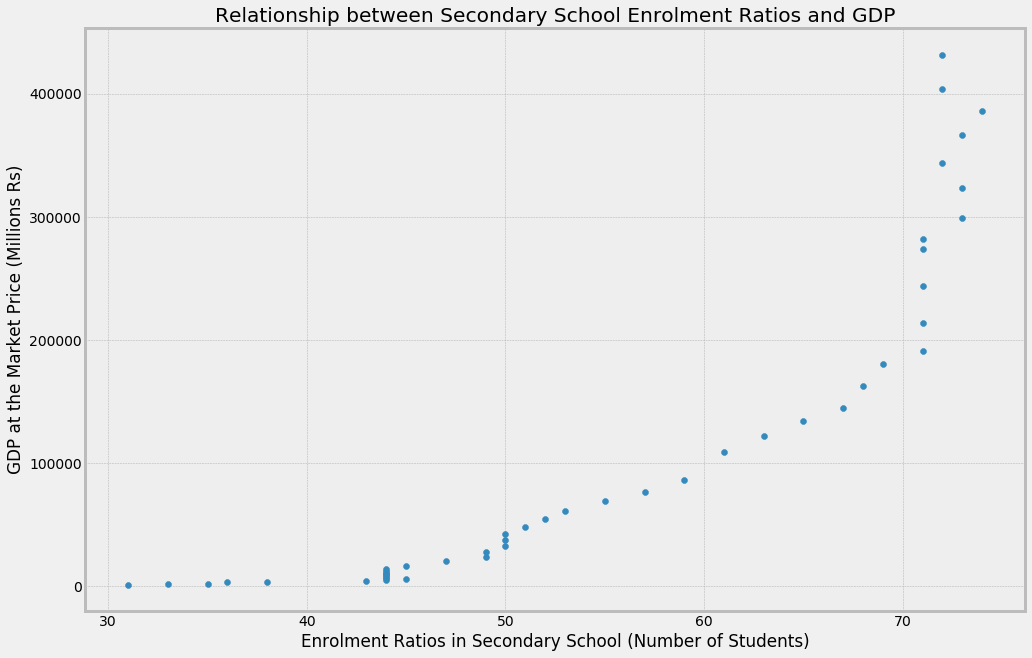

In [259]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_SecEduRatio.Ratio_Total, df_GDP.gdp_market_price.iloc[21:67])
plt.xlabel('Enrolment Ratios in Secondary School (Number of Students)')
plt.ylabel('GDP at the Market Price (Millions Rs)')
plt.title('Relationship between Secondary School Enrolment Ratios and GDP')
plt.show()

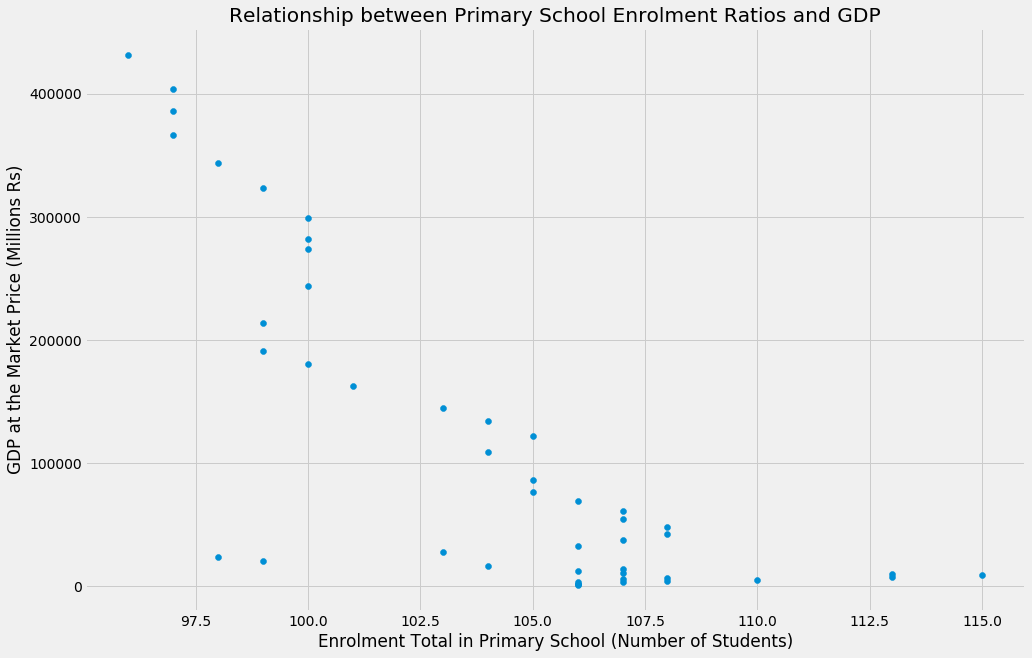

In [241]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_PrimEduRatio.Ratio_Total, df_GDP.gdp_market_price.iloc[21:67])
plt.xlabel('Enrolment Ratios in Primary School (Number of Students)')
plt.ylabel('GDP at the Market Price (Millions Rs)')
plt.title('Relationship between Primary School Enrolment Ratios and GDP')
plt.show()

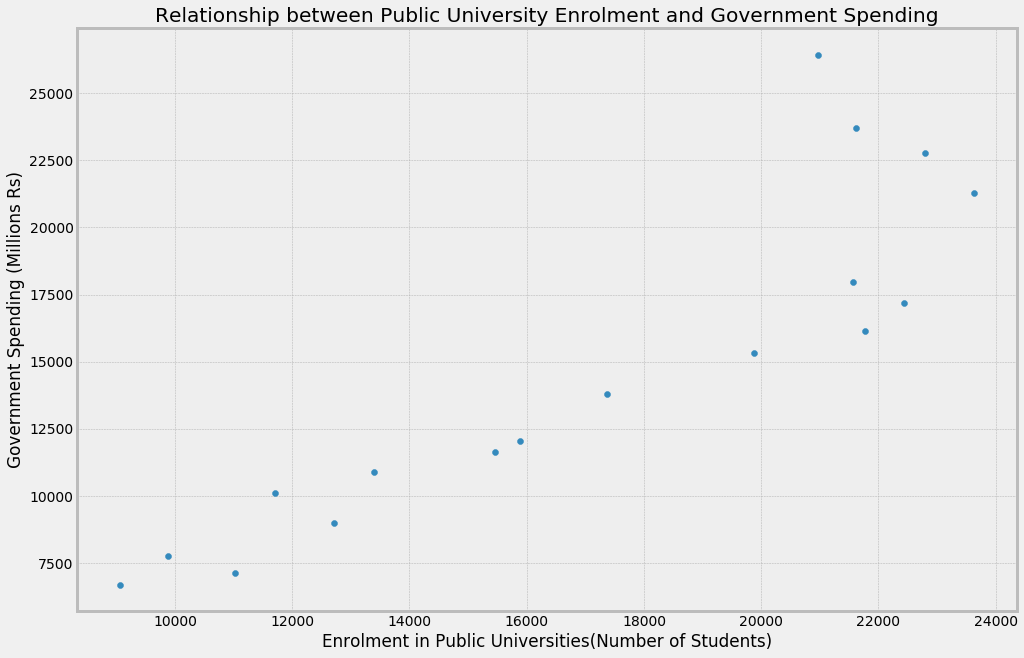

In [250]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_TerEduRatio.Public_Total, df_GDP.government.iloc[50:67])
plt.xlabel('Enrolment in Public Universities(Number of Students)')
plt.ylabel('Government Spending (Millions Rs)')
plt.title('Relationship between Public University Enrolment and Government Spending')
plt.show()

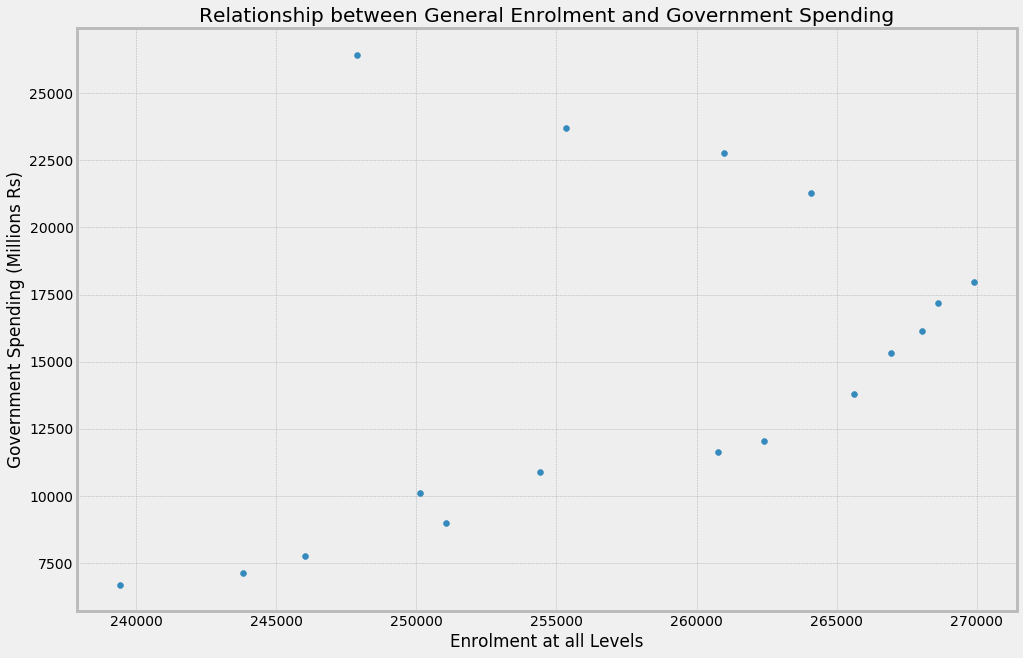

In [258]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_TerEduRatio.Overall_Total + df_PrimEduRatio.Enrolment_Total.iloc[28:45]+ df_SecEduRatio.Enrolment_Total.iloc[28:45], df_GDP.government.iloc[50:67])
plt.xlabel('Enrolment at all Levels')
plt.ylabel('Government Spending (Millions Rs)')
plt.title('Relationship between General Enrolment and Government Spending')
plt.show()

In [344]:
df_GDP.iloc[34:67]
#df_demographics.loc[idx['1984':'2016','Both Sexes'],'All ages']

,agriculture,mining,manufacturing,power,government,sevices,gdp_market_price
Years,,,,,,,
1984,1736.0,19.0,2183.0,326.0,690.0,685.0,12050.0
1985,2123.0,20.0,2864.0,438.0,775.0,720.0,13880.0
1986,2510.0,22.0,3830.0,605.0,880.0,776.0,16450.0
1987,2941.0,26.0,4976.0,676.0,1090.0,940.0,20341.0
1988,3140.0,32.0,5847.0,597.0,1410.0,1120.0,24061.0
1989,3461.0,40.0,6648.0,652.0,1790.0,1384.0,28083.0
1990,3998.0,50.0,7784.0,720.0,2285.0,1715.0,33030.0
1991,4206.0,60.0,8766.0,727.0,2680.0,2061.0,37553.0
1992,4590.0,70.0,9952.0,821.0,3065.0,2382.0,42393.0


Text(0.5,1,'Relationship between Population Growth and GDP ')

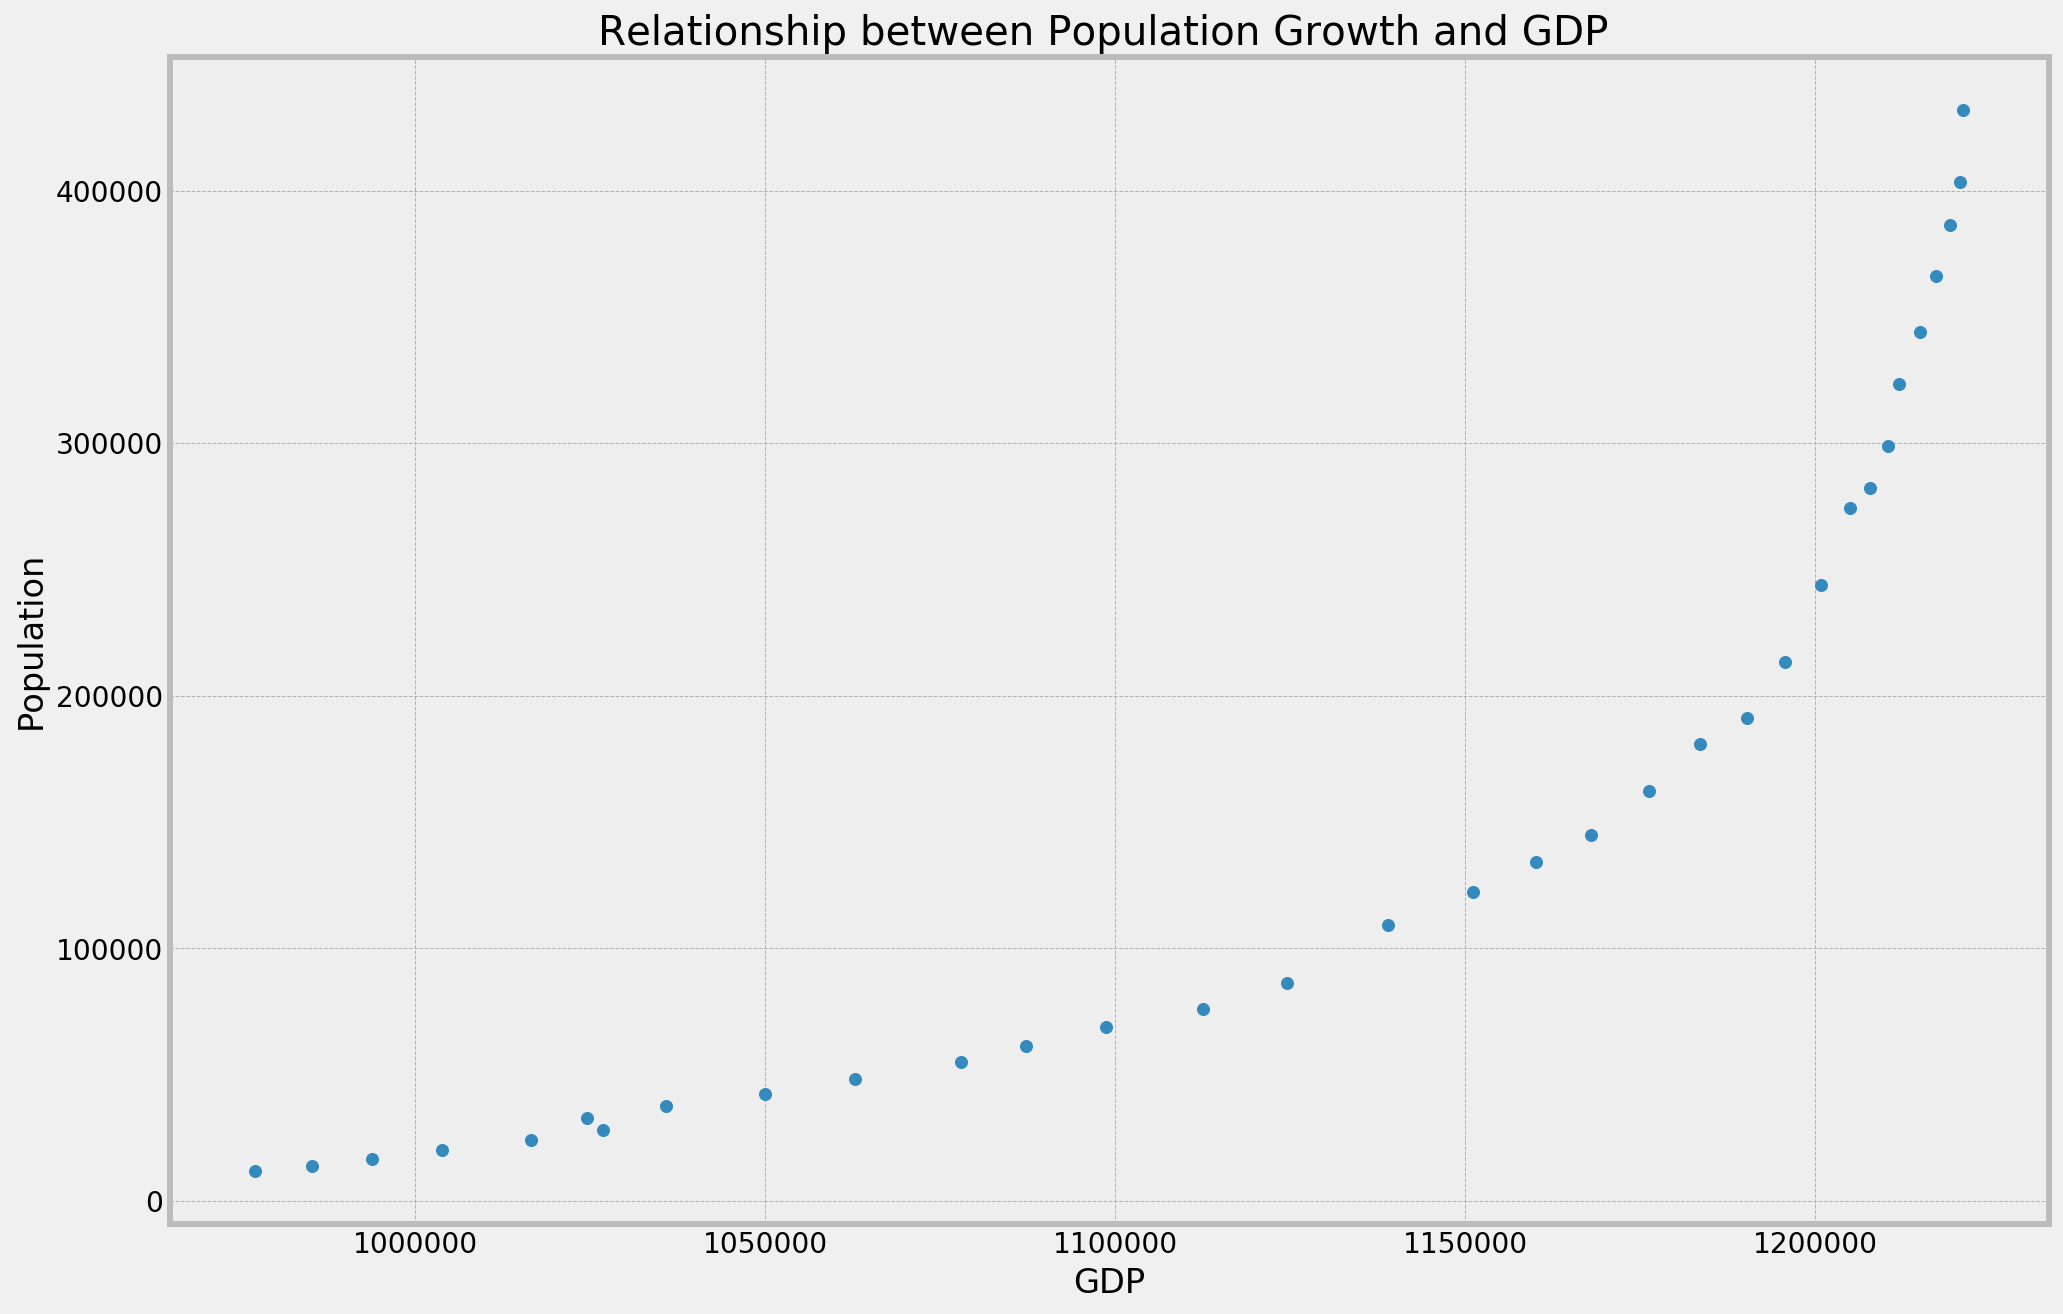

In [351]:
fig = plt.figure(figsize=(15,10))
x = df_demographics.loc[idx['1984':'2016','Both Sexes'],'All ages']
y = df_GDP.gdp_market_price.iloc[34:67]
plt.scatter(df_demographics.loc[idx['1984':'2016','Both Sexes'],'All ages'], df_GDP.gdp_market_price.iloc[34:67])
plt.xlabel('GDP')
plt.ylabel('Population')
plt.title('Relationship between Population Growth and GDP ')
#plt.show()

In [349]:
output_notebook()

Loading BokehJS ...

In [353]:
p = figure()
p.scatter(x, y)

bokeh.models.renderers.GlyphRenderer(
    id='b185c69b-f02a-4429-9926-c17641d81ba1',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='b33937a6-70d5-44d0-8710-ce96644008f3',
        callback=None,
        data={'y': {'__ndarray__': 'AAAAAACJx0AAAAAAABzLQAAAAACAENBAAAAAAEDd00AAAAAAQH/XQAAAAADAbNtAAAAAAMAg4EAAAAAAIFbiQAAAAAAgs+RAAAAAAECH50AAAAAAAMjqQAAAAAAgBu5AAAAAAGDa8EAAAAAAUJfyQAAAAAAAEvVAAAAAAIC1+kAAAAAAoOL9QAAAAADAZwBBAAAAAPi0AUEAAAAAmM8DQQAAAABgFQZBAAAAAAhdB0EAAAAAIA4KQQAAAADwyA1BAAAAADC+EEEAAAAAyDsRQQAAAACAPBJBAAAAALi7E0EAAAAAGP4UQQAAAADUWxZBAAAAANSSF0EAAAAAQKEYQQAAAAA8WxpB',
          'shape': (33,),
          'dtype': 'float64'},
         'x': {'__ndarray__': 'AAAAANLRLUEAAAAA9BAuQQAAAAB2VC5BAAAAACSiLkEAAAAAKAYvQQAAAAD6VS9BAAAAAHZEL0EAAAAAPpwvQQAAAABvBTBBAAAAAJo3MEEAAAAAunIwQQAAAABvlzBBAAAAAKzDMEEAAAAAPPowQQAAAACcKDFBAAAAABlhMUEAAAAAdpAxQQAAAACTszFBAAAAAHvSMUEAAAAAA/MxQQAAAAAtDzJBAAAAANkpMkEAAAAAnD4yQQAAAAD3UjJBAAAAANtiMkEAAAAAIm4yQQAAAAAXeDJBAAAAAEJ+MkEAAAAAC4oyQQAAAAA9kzJBAAAAAMGaMkEAAAAAN6AyQQAAAABdojJB',
          'shape': (33,),
          'dtype': 'float64'}},
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        selected=bokeh.models.selections.Selection(
            id='50341f47-c074-4702-84b5-e072ae27ead2',
            indices=[],
            js_event_callbacks={},
            js_property_callbacks={},
            line_indices=[],
            multiline_indices={},
            name=None,
            subscribed_events=[],
            tags=[]),
        selection_policy=bokeh.models.selections.UnionRenderers(
            id='31fc9c95-2e88-44f0-bab1-b4dfc93c95d1',
            js_event_callbacks={},
            js_property_callbacks={},
            name=None,
            subscribed_events=[],
            tags=[]),
        subscribed_events=[],
        tags=[]),
    glyph=bokeh.models.markers.Circle(
        id='bdbcebf9-f688-4e7d-b259-59b26c3eee5b',
        angle={'value': 0.0, 'units': 'rad'},
        fill_alpha={'value': 1.0},
        fill_color={'value': '#1f77b4'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 1.0},
        line_cap='butt',
        line_color={'value': '#1f77b4'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'value': 4, 'units': 'screen'},
        subscribed_events=[],
        tags=[],
        x={'field': 'x'},
        y={'field': 'y'}),
    hover_glyph=None,
    js_event_callbacks={},
    js_property_callbacks={},
    level='glyph',
    muted=False,
    muted_glyph=None,
    name=None,
    nonselection_glyph=bokeh.models.markers.Circle(
        id='c04dcdae-54d5-4a3b-8b45-832b120454ab',
        angle={'value': 0.0, 'units': 'rad'},
        fill_alpha={'value': 0.1},
        fill_color={'value': '#1f77b4'},
        js_event_callbacks={},
        js_property_callbacks={},
        line_alpha={'value': 0.1},
        line_cap='butt',
        line_color={'value': '#1f77b4'},
        line_dash=[],
        line_dash_offset=0,
        line_join='bevel',
        line_width={'value': 1},
        name=None,
        radius=None,
        radius_dimension='x',
        size={'value': 4, 'units': 'screen'},
        subscribed_events=[],
        tags=[],
        x={'field': 'x'},
        y={'field': 'y'}),
    selection_glyph=None,
    subscribed_events=[],
    tags=[],
    view=bokeh.models.sources.CDSView(
        id='936653ae-5387-45c5-95b0-d5eecc950c4b',
        filters=[],
        js_event_callbacks={},
        js_property_callbacks={},
        name=None,
        source=bokeh.models.sources.ColumnDataSource(
            id='b33937a6-70d5-44d0-8710-ce96644008f3',
            callback=None,
            data={'y': {'__ndarray__': 'AAAAAACJx0AAAAAAABzLQAAAAACAENBAAAAAAEDd00AAAAAAQH/XQAAAAADAbNtAAAAAAMAg4EAAAAAAIFbiQAAAAAAgs+RAAAAAAECH50AAAAAAAMjqQAAAAAAgBu5AAAAAAGDa

In [354]:
show(p)

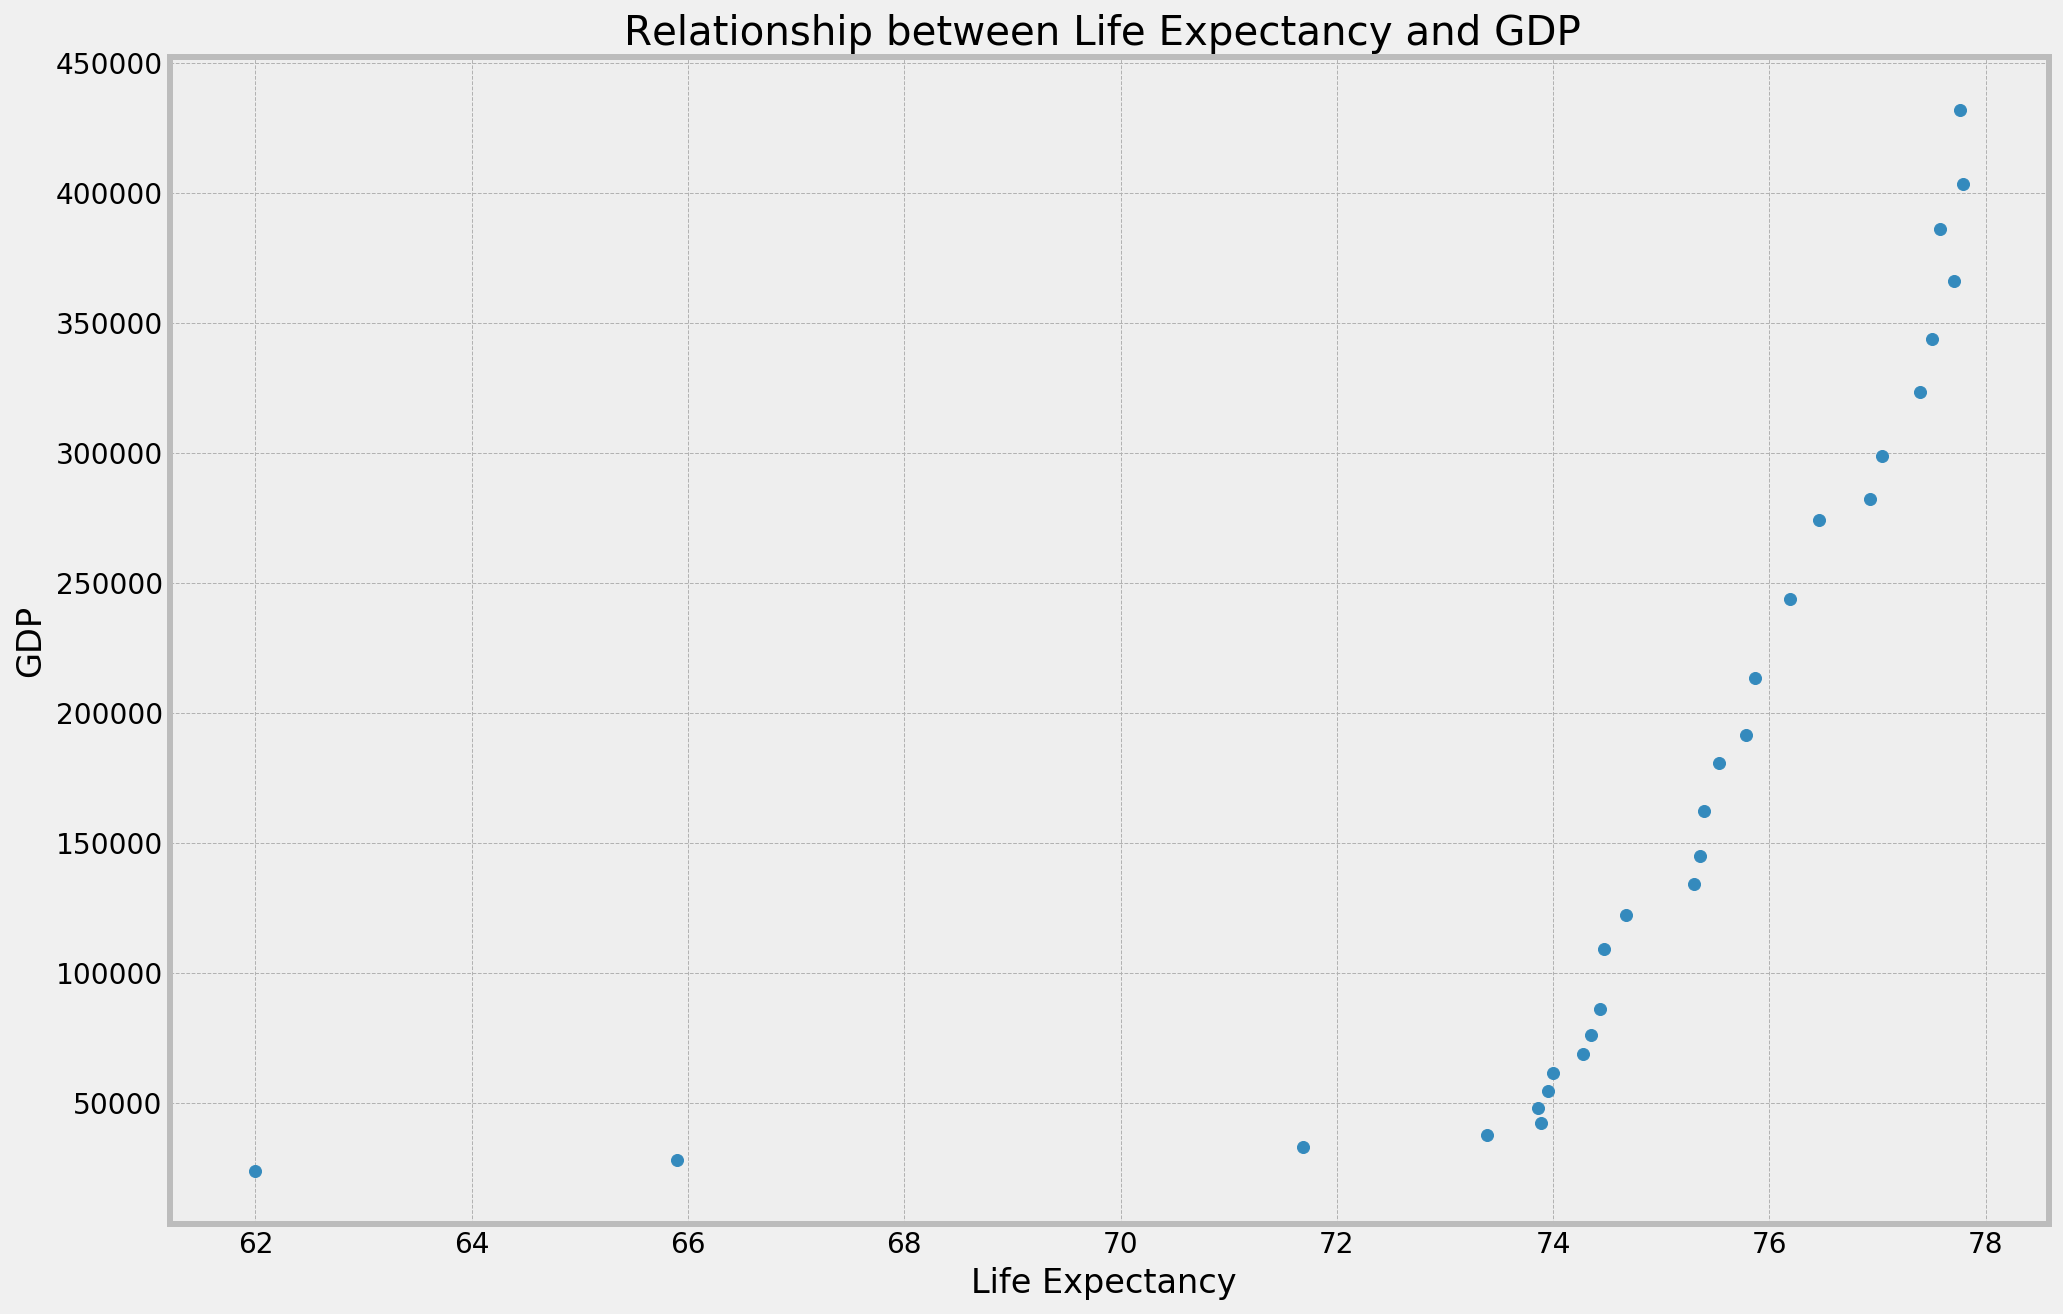

In [369]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_LifeExp['Female'], df_GDP.gdp_market_price.iloc[38:67])
plt.ylabel('GDP')
plt.xlabel('Life Expectancy ')
plt.title('Relationship between Life Expectancy and GDP ')
plt.show()

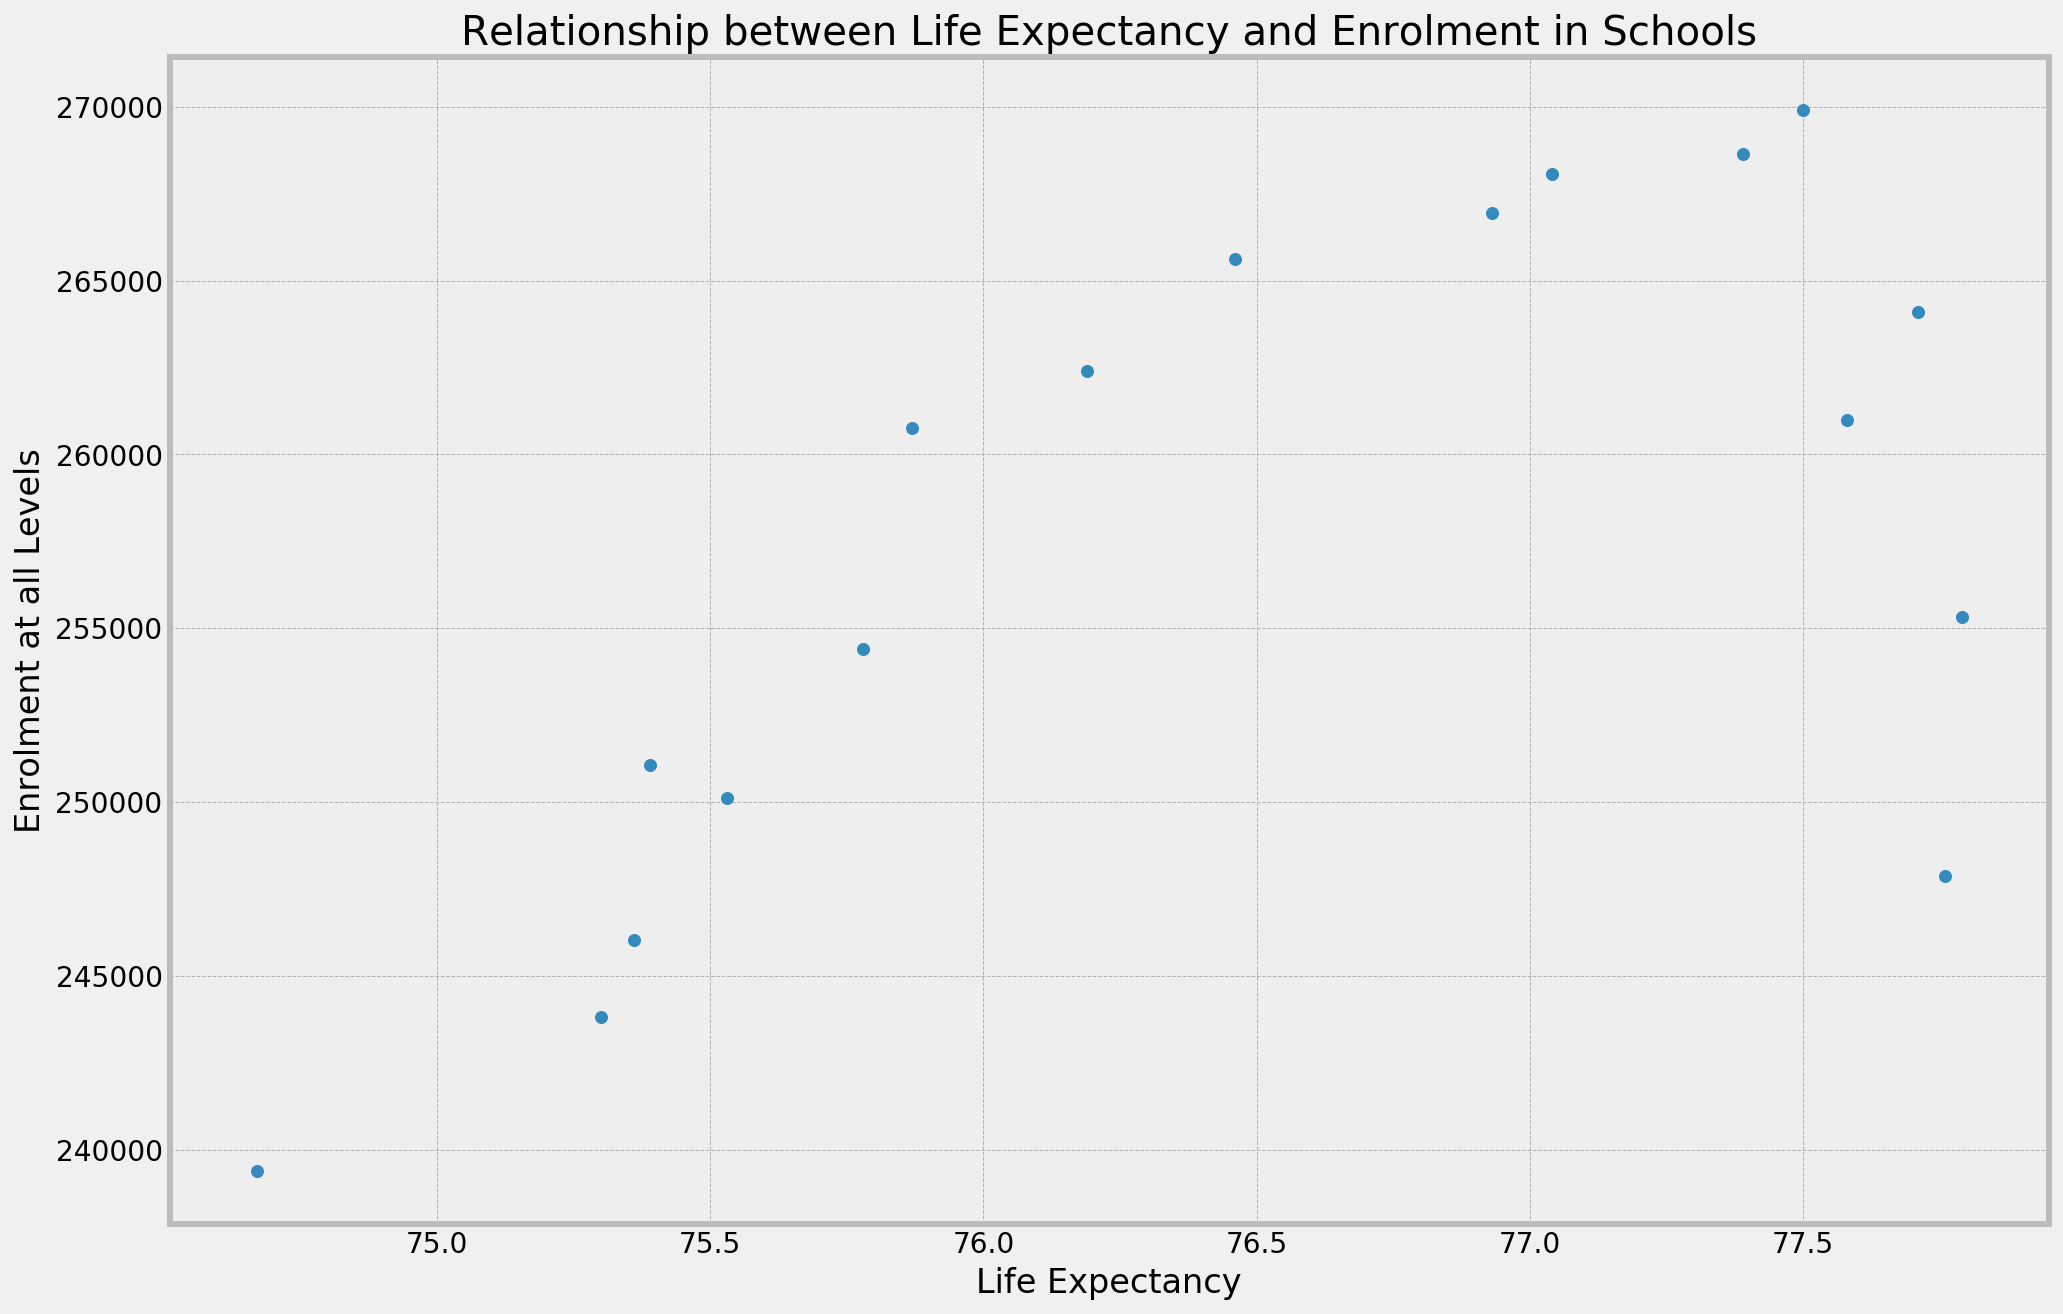

In [370]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_LifeExp['Female'].iloc[12:29], df_TerEduRatio.Overall_Total + df_PrimEduRatio.Enrolment_Total.iloc[28:45]+ df_SecEduRatio.Enrolment_Total.iloc[28:45])
plt.xlabel('Life Expectancy')
plt.ylabel('Enrolment at all Levels')
plt.title('Relationship between Life Expectancy and Enrolment in Schools')
plt.show()

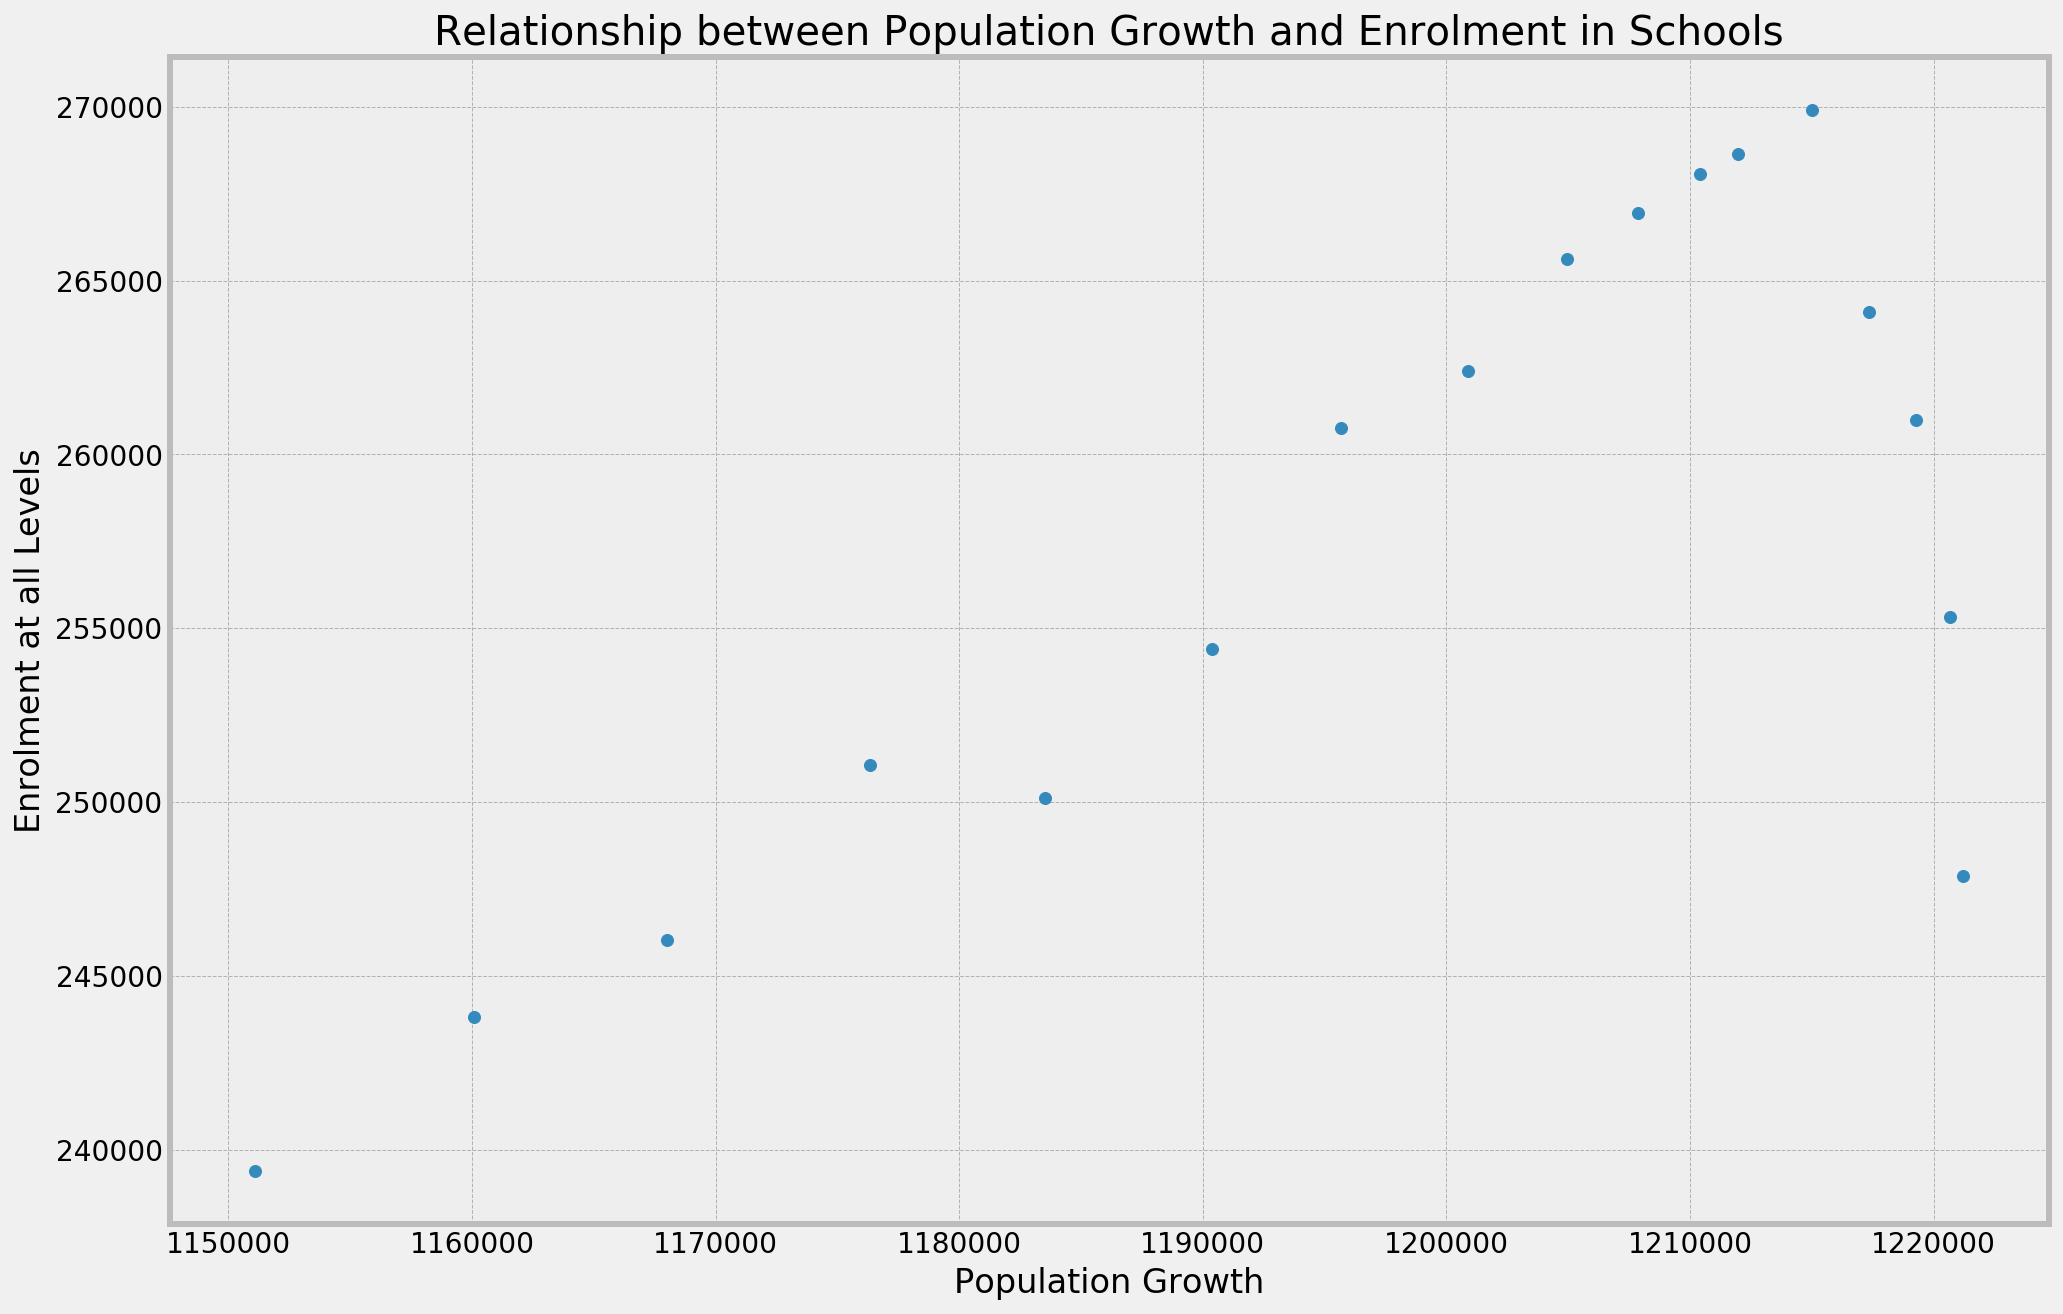

In [381]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df_demographics.loc[idx['2000':'2016','Both Sexes'],'All ages'], df_TerEduRatio.Overall_Total + df_PrimEduRatio.Enrolment_Total.iloc[28:45]+ df_SecEduRatio.Enrolment_Total.iloc[28:45])
plt.xlabel('Population Growth')
plt.ylabel('Enrolment at all Levels')
plt.title('Relationship between Population Growth and Enrolment in Schools')
plt.show()

In [462]:
type(college_kids)

pandas.core.series.Series

In [464]:
type(df_TerEduRatio['Overall_Male'] + df_TerEduRatio['Overall_Female'])

pandas.core.series.Series

In [465]:
len(college_kids[-17:])

17

<function matplotlib.pyplot.show(*args, **kw)>

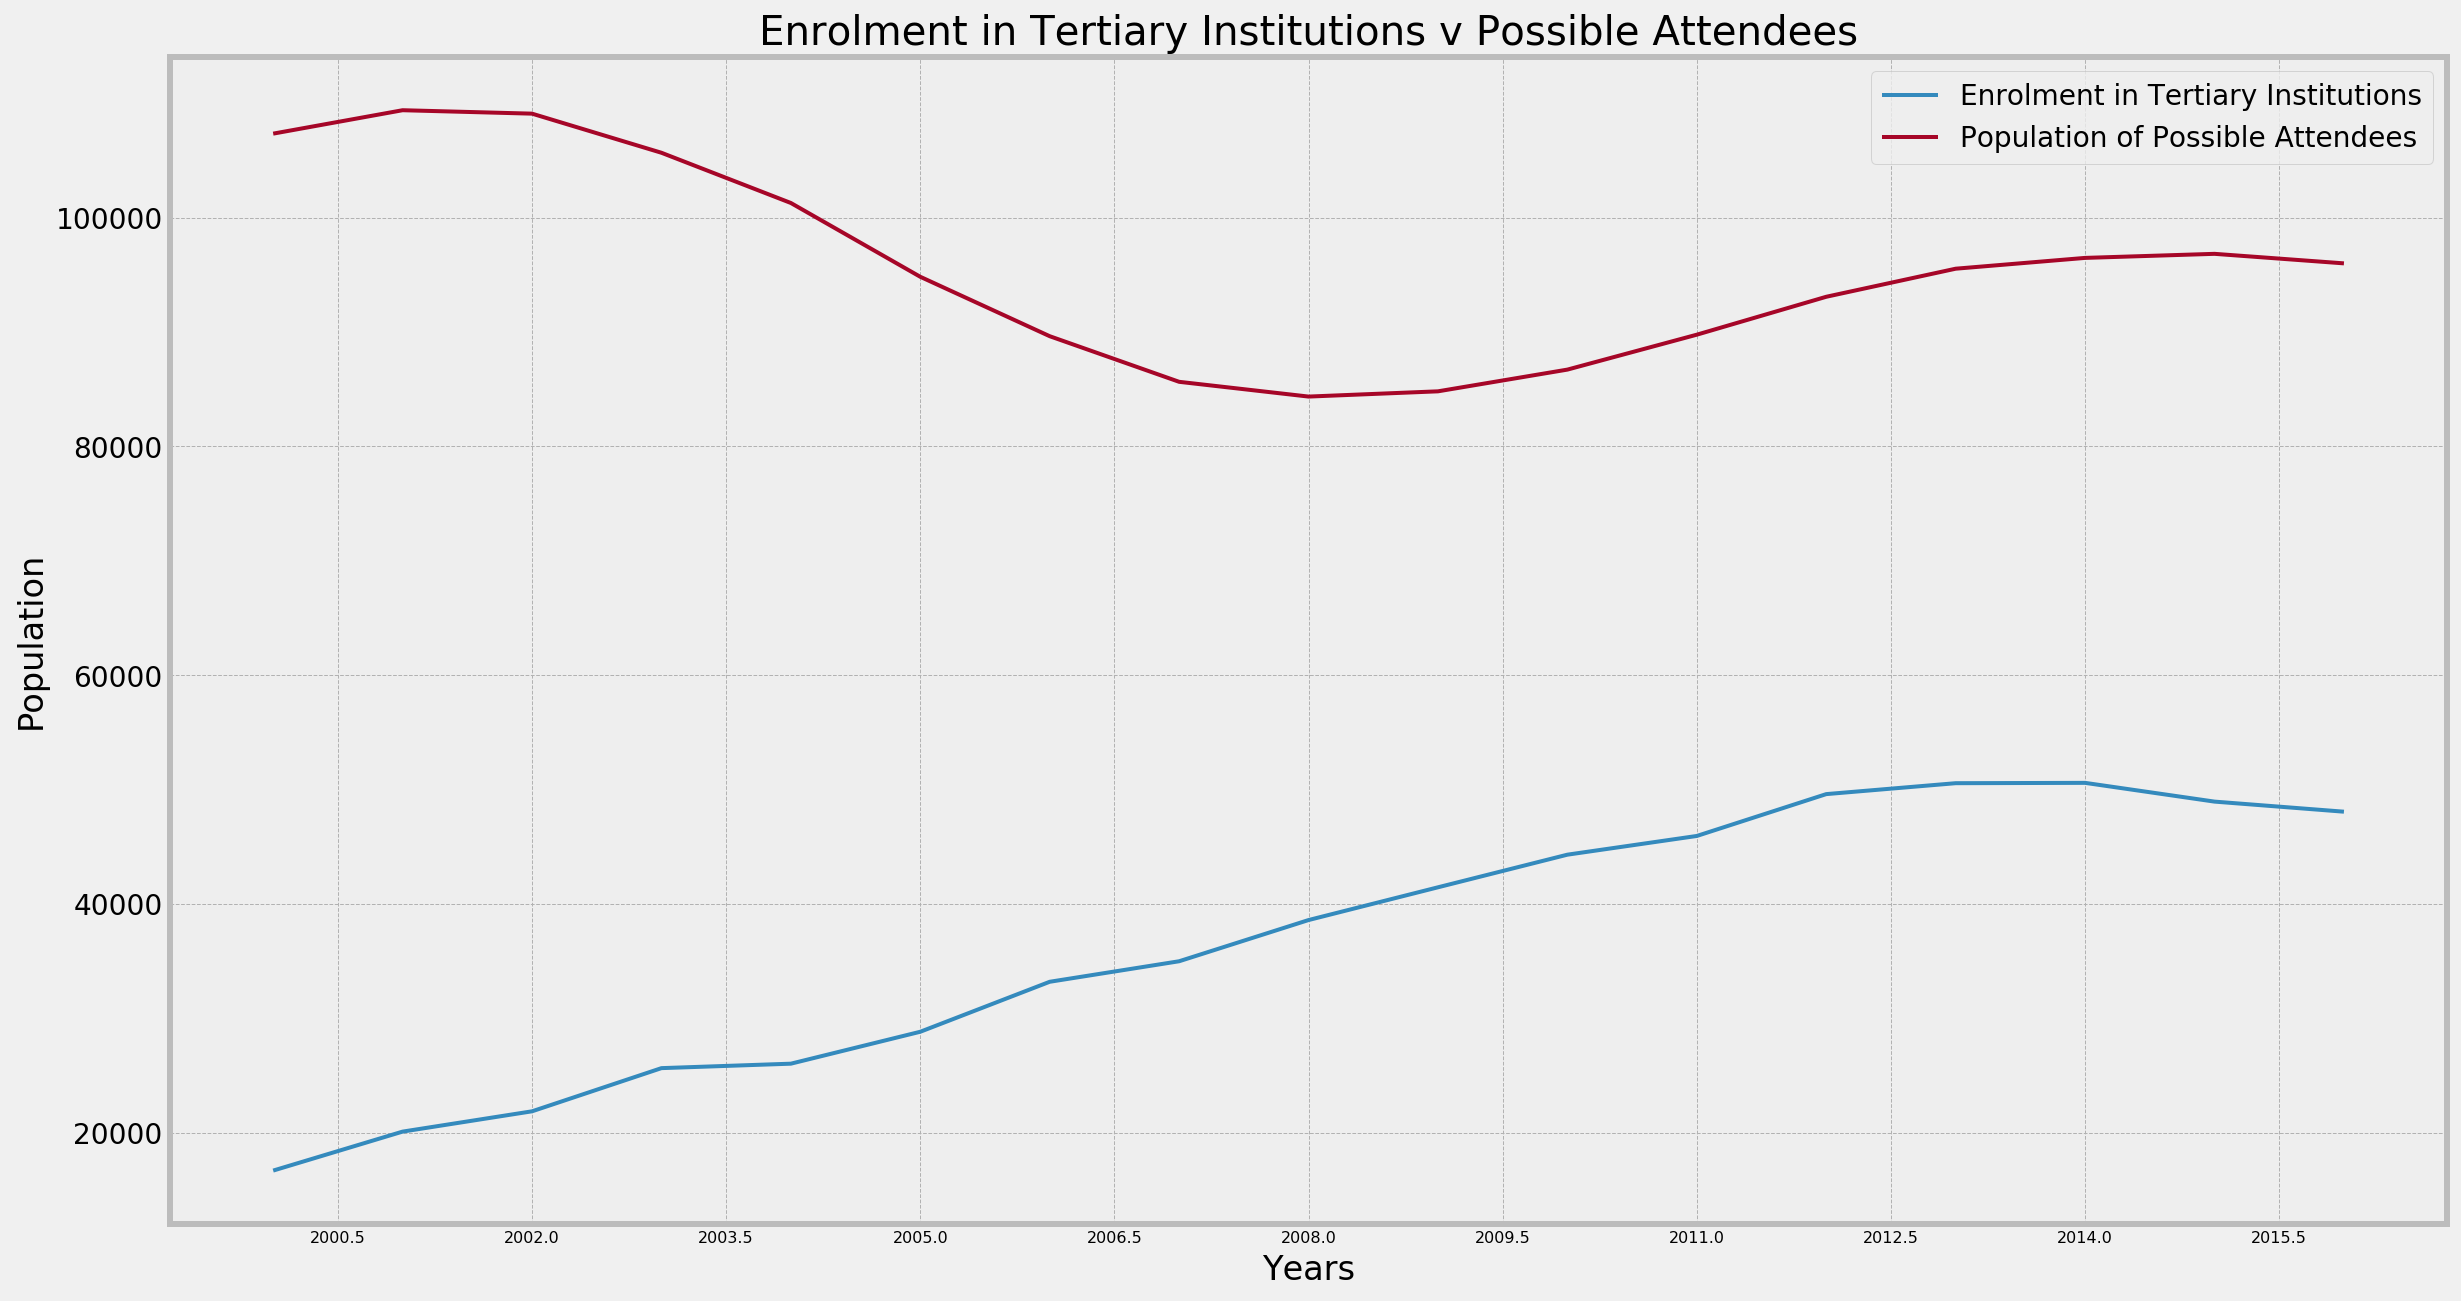

In [468]:
x = df_TerEduRatio.index
y = df_TerEduRatio['Overall_Male'] + df_TerEduRatio['Overall_Female']
z = college_kids[-17:]



fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(16))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y)
plt.plot(x,z)

plt.legend(['Enrolment in Tertiary Institutions','Population of Possible Attendees'])
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Enrolment in Tertiary Institutions v Possible Attendees')
plt.show

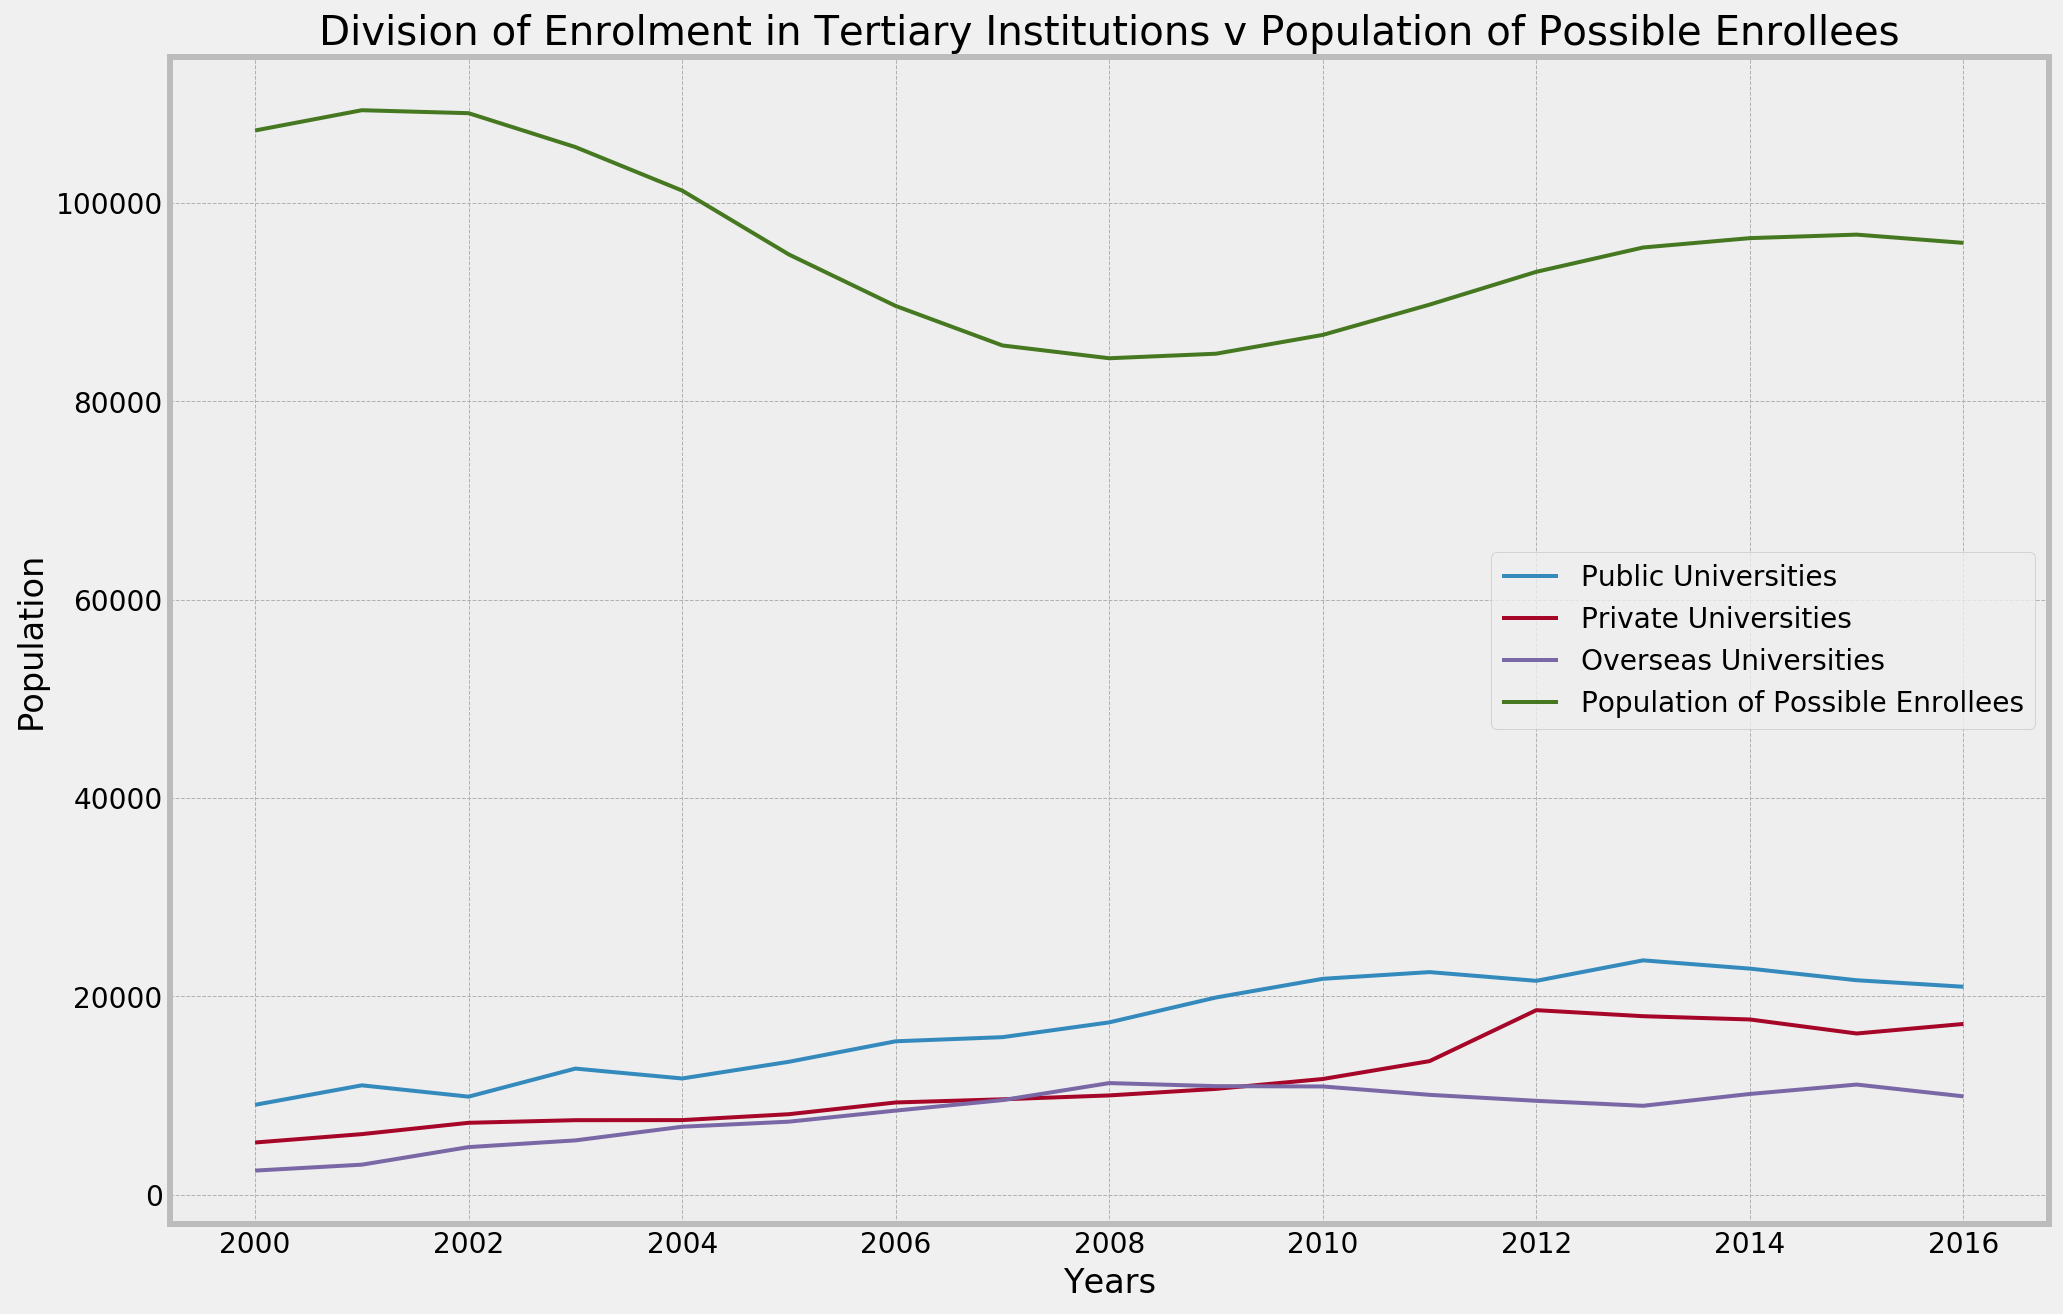

In [474]:
fig = plt.figure(figsize=(15,10), linewidth = 4)
x = df_TerEduRatio.index
#df_ter_educ[['Public_Total', 'Private_Total', 'Overseas_Total']].plot(figsize=(25,10), linewidth = 4, legend = False,)
plt.plot(x, df_TerEduRatio['Public_Total'])
plt.plot(x, df_TerEduRatio['Private_Total'])
plt.plot(x, df_TerEduRatio['Overseas_Total'])
plt.plot(x, college_kids)

         
plt.legend(['Public Universities', 'Private Universities', 'Overseas Universities', 'Population of Possible Enrollees'], loc = 'best')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Division of Enrolment in Tertiary Institutions v Population of Possible Enrollees')
plt.show()
